In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Flight Price Prediction

In [2]:
df=pd.read_csv(r"C:\Users\A\Desktop\Flight_URl\flight_prediction_dataset")
df.head(5)

,Unnamed: 0,Airline,Flight_number,Dep_time,Source,Class,Route,Duration,Stop,Arrival_time,Destination,Fare,Dep_Date
0,0,SpiceJet,SG- 377,21:05,Patna,(ECONOMY),['PAT → BOM'],02h 35m,non-stop,23:40,Mumbai,"7,091",Tue-28Feb2023
1,1,Indigo,6E-6734,21:05,Patna,(ECONOMY),['PAT → BOM'],02h 55m,non-stop,00:00,Mumbai,"7,092",Tue-28Feb2023
2,2,GO FIRST,G8- 352,14:15,Patna,(ECONOMY),['PAT → BOM'],02h 30m,non-stop,16:45,Mumbai,"7,089",Tue-28Feb2023
3,3,GO FIRST,G8-2512,12:25,Patna,(ECONOMY),"['PAT → DEL', 'DEL → BOM']",04h 50m,1-stop,17:15,Mumbai,"7,091",Tue-28Feb2023
4,4,GO FIRST,G8- 144,11:20,Patna,(ECONOMY),"['PAT → DEL', 'DEL → BOM']",05h 10m,1-stop,16:30,Mumbai,"7,091",Tue-28Feb2023


In [3]:
df.shape

(14130, 13)

In [4]:
print("Dataset contains {0} rows datapoints and {1} columns or variables.".format(df.shape[0],df.shape[1]))

Dataset contains 14130 rows datapoints and 13 columns or variables.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14130 entries, 0 to 14129
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     14130 non-null  int64 
 1   Airline        14130 non-null  object
 2   Flight_number  14130 non-null  object
 3   Dep_time       14130 non-null  object
 4   Source         14130 non-null  object
 5   Class          14130 non-null  object
 6   Route          14130 non-null  object
 7   Duration       14130 non-null  object
 8   Stop           14130 non-null  object
 9   Arrival_time   14130 non-null  object
 10  Destination    14130 non-null  object
 11  Fare           14001 non-null  object
 12  Dep_Date       14130 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.4+ MB


* Descriptive statstics

In [6]:
df.describe()

,Unnamed: 0
count,14130.000000
mean,7064.500000
std,4079.123987
min,0.000000
25%,3532.250000
50%,7064.500000
75%,10596.750000
max,14129.000000


In [7]:
df.isna().sum()

Unnamed: 0         0
Airline            0
Flight_number      0
Dep_time           0
Source             0
Class              0
Route              0
Duration           0
Stop               0
Arrival_time       0
Destination        0
Fare             129
Dep_Date           0
dtype: int64

In [8]:
df.isna().sum().sum()

129

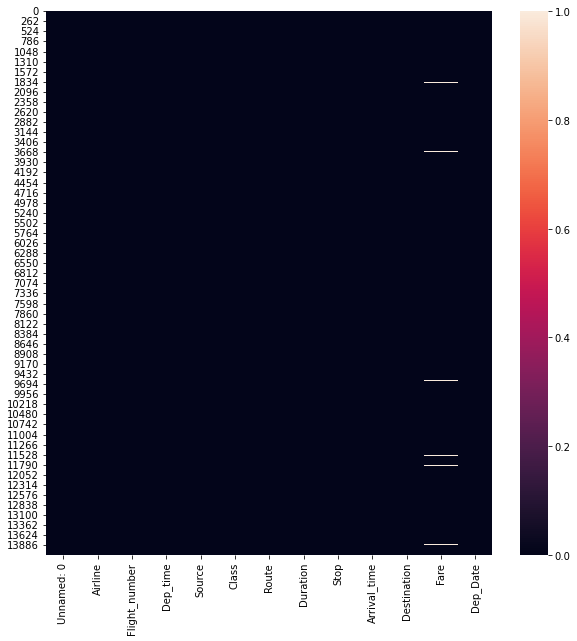

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

* There are 129 null values in dataset.

In [10]:
df=df.dropna()


In [11]:
df.shape

(14001, 13)

* Number of categories in variables .

In [12]:
for i in df.columns:
    print(i,":\n")
    print(len(df[i].unique()))
    print('______________________________\n')

Unnamed: 0 :

14001
______________________________

Airline :

6
______________________________

Flight_number :

1180
______________________________

Dep_time :

267
______________________________

Source :

7
______________________________

Class :

1
______________________________

Route :

661
______________________________

Duration :

418
______________________________

Stop :

13
______________________________

Arrival_time :

271
______________________________

Destination :

7
______________________________

Fare :

2916
______________________________

Dep_Date :

38
______________________________



* Unique Values and Thier counts.

In [13]:
for i in df.columns:
    print(i,"\n")
    print(df[i].unique())
    print('----------------------------------\n')
    print(df[i].value_counts(),'\n')
    print('----------------------------------\n')

Unnamed: 0 

[    0     1     2 ... 14127 14128 14129]
----------------------------------

0        1
9414     1
9402     1
9403     1
9404     1
        ..
4706     1
4707     1
4708     1
4710     1
14129    1
Name: Unnamed: 0, Length: 14001, dtype: int64 

----------------------------------

Airline 

['SpiceJet' 'Indigo' 'GO FIRST' 'Air India' 'Vistara' 'AirAsia']
----------------------------------

Air India    4358
Vistara      4317
Indigo       2802
GO FIRST     1208
AirAsia       758
SpiceJet      558
Name: Airline, dtype: int64 

----------------------------------

Flight_number 

['SG- 377' '6E-6734' 'G8- 352' ... 'I5-582' '6E- 255' '6E- 182']
----------------------------------

AI-408     269
UK-716     229
UK-718     219
AI-416     201
AI-852     181
          ... 
I5-315       1
I5-774       1
I5-799       1
SG-4002      1
6E- 182      1
Name: Flight_number, Length: 1180, dtype: int64 

----------------------------------

Dep_time 

['21:05' '14:15' '12:25' '11:20' '16:05'

# 2] Date_of _journey into day of week, week of year, month , date of month, Quarter of year

In [14]:
df['Datetime'] = pd.to_datetime(df['Dep_Date'],dayfirst=True,yearfirst=False)


In [15]:
df['date']=df['Datetime'].dt.day

In [16]:
df['Quarter']=df['Datetime'].dt.quarter

In [17]:
df['Month']=df['Datetime'].dt.month

In [18]:
df['day']=df['Datetime'].dt.day_name()
df['week']=df['Datetime'].dt.week

In [19]:
df[['Datetime','Dep_Date','date','Quarter','Month','day','week']][121:131]

,Datetime,Dep_Date,date,Quarter,Month,day,week
121,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
122,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
123,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
124,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
125,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
126,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
127,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
128,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
129,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10
130,2023-03-12,Sun-12Mar2023,12,1,3,Sunday,10


1] date,Quarter, Month,day,week  feature will be tereated as categorical features model.

2] date is discrete in nature.

# 3 ]  Deptime into Hour and minute sepration

In [20]:
df['Dep_hour']=(pd.to_datetime(df['Dep_time'])).dt.hour
df['Dep_min']=(pd.to_datetime(df['Dep_time'])).dt.minute

In [21]:
df[['Dep_time','Dep_hour','Dep_min']][10000:10010]

,Dep_time,Dep_hour,Dep_min
10091,17:30,17,30
10092,19:10,19,10
10093,06:00,6,0
10094,07:00,7,0
10095,19:40,19,40
10096,21:45,21,45
10097,18:50,18,50
10098,23:10,23,10
10099,08:30,8,30
10100,06:10,6,10


1] Dep_hour wil be treated as  categorical as we are using Dep_minute as seprate variable.

2] Hours with seprate varibles for  minute and seconds are discrete in nature.

# 4]  & 5]  Arrival time hour and minute sepration 

In [22]:
df['Arrival_Hour'] = (pd.to_datetime(df['Arrival_time'])).dt.hour
df['Arrival_min'] = (pd.to_datetime(df['Arrival_time'])).dt.minute


1] Arrival_hour wil be treated as categorical as we are using Arrival_minute as seprate variable.

2] Hours with seprate varibles for minute and seconds are discrete in nature.

# 6] duration in minutes.

In [23]:
def dur(i):
    return eval(i.replace('h','*60').replace(' ','+').replace('m',''))

In [24]:
import re
def dur1(i):
    a=re.sub("\D",'',i)
    return (int(a[:2])*60)+int(a[2:])

In [25]:
df['Duration']=df['Duration'].apply(dur1)

In [26]:
# Stop

In [27]:
def stop(i):    
    if i.startswith('1-stop'):
        return '1-stop'
    else:
        return i

In [28]:
df['Stop']=df['Stop'].apply(stop)

In [29]:
df['Stop'].unique()

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

In [30]:
## Route

In [31]:
df["Route"]=df["Route"].apply(lambda x: re.sub("\W",' ',x))

In [32]:
first_stop=list()
for i in df.index:
    if len(df['Route'][i].split())>=2 :
        first_stop.append(df['Route'][i].split()[1])
    else:
        first_stop.append('NA')
        
df['First_Stop']=first_stop      

In [33]:
second_stop=list()
for i in df.index:
    if len(df['Route'][i].split())==6:
        second_stop.append(df['Route'][i].split()[4])
    else:
        second_stop.append('NA')
        
df['Second_stop']=second_stop      

In [34]:
df[df['Stop']=='2+-stop']

,Unnamed: 0,Airline,Flight_number,Dep_time,Source,Class,Route,Duration,Stop,Arrival_time,...,Quarter,Month,day,week,Dep_hour,Dep_min,Arrival_Hour,Arrival_min,First_Stop,Second_stop
388,388,Vistara,UK-868,14:40,Goa,(ECONOMY),GOI BLR BLR DEL DEL CCU,1060,2+-stop,08:20,...,4,11,Tuesday,45,14,40,8,20,BLR,DEL
389,389,Vistara,UK-868,14:40,Goa,(ECONOMY),GOI BLR BLR DEL DEL CCU,1060,2+-stop,08:20,...,4,11,Tuesday,45,14,40,8,20,BLR,DEL
390,390,Vistara,UK-868,14:40,Goa,(ECONOMY),GOI BLR BLR DEL DEL CCU,1060,2+-stop,08:20,...,4,11,Tuesday,45,14,40,8,20,BLR,DEL
393,393,Vistara,UK-868,14:40,Goa,(ECONOMY),GOI BLR BLR DEL DEL CCU,1060,2+-stop,08:20,...,4,11,Tuesday,45,14,40,8,20,BLR,DEL
401,401,Vistara,UK-868,14:40,Goa,(ECONOMY),GOI BLR BLR DEL DEL CCU,1135,2+-stop,09:35,...,4,11,Tuesday,45,14,40,9,35,BLR,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14099,14099,Vistara,UK-718,10:25,Patna,(ECONOMY),PAT DEL DEL BLR BLR GOI,1660,2+-stop,14:05,...,4,11,Saturday,45,10,25,14,5,DEL,BLR
14116,14116,Vistara,UK-718,10:25,Patna,(ECONOMY),PAT DEL DEL BLR BLR GOI,1660,2+-stop,14:05,...,4,11,Saturday,45,10,25,14,5,DEL,BLR
14117,14117,Vistara,UK-718,10:25,Patna,(ECONOMY),PAT DEL DEL BLR BLR GOI,1660,2+-stop,14:05,...,4,11,Saturday,45,10,25,14,5,DEL,BLR
14119,14119,Vistara,UK-718,10:25,Patna,(ECONOMY),PAT DEL DEL BLR BLR GOI,1660,2+-stop,14:05,...,4,11,Saturday,45,10,25,14,5,DEL,BLR


In [35]:
df['Route']=df['Route'].apply(lambda x: x.replace('   ','-'))


In [36]:
df['Route']=df['Route'].apply(lambda x: x.replace(' ',''))


### Fare


In [38]:
df["Fare"]=df['Fare'].apply(lambda x: int(x.replace(',','')))

In [39]:
df.head()

,Unnamed: 0,Airline,Flight_number,Dep_time,Source,Class,Route,Duration,Stop,Arrival_time,...,Quarter,Month,day,week,Dep_hour,Dep_min,Arrival_Hour,Arrival_min,First_Stop,Second_stop
0,0,SpiceJet,SG- 377,21:05,Patna,(ECONOMY),PAT-BOM,155,non-stop,23:40,...,1,2,Tuesday,9,21,5,23,40,BOM,NA
1,1,Indigo,6E-6734,21:05,Patna,(ECONOMY),PAT-BOM,175,non-stop,00:00,...,1,2,Tuesday,9,21,5,0,0,BOM,NA
2,2,GO FIRST,G8- 352,14:15,Patna,(ECONOMY),PAT-BOM,150,non-stop,16:45,...,1,2,Tuesday,9,14,15,16,45,BOM,NA
3,3,GO FIRST,G8-2512,12:25,Patna,(ECONOMY),PAT-DEL-DEL-BOM,290,1-stop,17:15,...,1,2,Tuesday,9,12,25,17,15,DEL,NA
4,4,GO FIRST,G8- 144,11:20,Patna,(ECONOMY),PAT-DEL-DEL-BOM,310,1-stop,16:30,...,1,2,Tuesday,9,11,20,16,30,DEL,NA


* After Feature manipuation and creation

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14001 entries, 0 to 14129
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     14001 non-null  int64         
 1   Airline        14001 non-null  object        
 2   Flight_number  14001 non-null  object        
 3   Dep_time       14001 non-null  object        
 4   Source         14001 non-null  object        
 5   Class          14001 non-null  object        
 6   Route          14001 non-null  object        
 7   Duration       14001 non-null  int64         
 8   Stop           14001 non-null  object        
 9   Arrival_time   14001 non-null  object        
 10  Destination    14001 non-null  object        
 11  Fare           14001 non-null  int64         
 12  Dep_Date       14001 non-null  object        
 13  Datetime       14001 non-null  datetime64[ns]
 14  date           14001 non-null  int64         
 15  Quarter        1400

* Descriptive stats.

In [41]:
df.describe()

,Unnamed: 0,Duration,Fare,date,Quarter,Month,week,Dep_hour,Dep_min,Arrival_Hour,Arrival_min
count,14001.000000,14001.000000,14001.000000,14001.000000,14001.000000,14001.000000,14001.000000,14001.000000,14001.000000,14001.000000,14001.000000
mean,7062.819227,747.543747,11521.637312,16.511821,2.343118,6.337404,25.742661,13.186130,26.763088,14.330191,27.060210
std,4081.511379,472.681846,5256.895224,8.814907,1.486743,4.736576,20.432005,5.633592,17.738584,6.420762,17.471708
min,0.000000,60.000000,2502.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3525.000000,395.000000,8065.000000,8.000000,1.000000,2.000000,8.000000,8.000000,10.000000,9.000000,10.000000
50%,7062.000000,665.000000,10715.000000,19.000000,1.000000,3.000000,13.000000,14.000000,30.000000,15.000000,25.000000
75%,10599.000000,1030.000000,13676.000000,24.000000,4.000000,12.000000,48.000000,18.000000,45.000000,20.000000,45.000000
max,14129.000000,3080.000000,53514.000000,31.000000,4.000000,12.000000,52.000000,23.000000,55.000000,23.000000,55.000000


1]  Duration has min value of 5 minute  and Maximum is 2860 minute (Approx 2 days).

2] 75% data in Duration feature is upto 930 minute (Approx 15 hours) 

3] Rrange of dates of flights are 1 to 27 

4] All data is between 2  quarter of year as all databelongs to march to june .



* Eliminatiing Unwanted features from dataset.

In [42]:
df=df.drop(columns=['Dep_Date','Datetime','Dep_time','Arrival_time','Route','Unnamed: 0','Flight_number','Class'],axis=1)
df.shape

(14001, 17)

In [43]:
for i in df.columns:
    print(i,"\n")
    print(df[i].unique())
    print('----------------------------------\n')
    print(df[i].value_counts(),'\n')
    print('----------------------------------\n')

Airline 

['SpiceJet' 'Indigo' 'GO FIRST' 'Air India' 'Vistara' 'AirAsia']
----------------------------------

Air India    4358
Vistara      4317
Indigo       2802
GO FIRST     1208
AirAsia       758
SpiceJet      558
Name: Airline, dtype: int64 

----------------------------------

Source 

['Patna' 'Bangalore' 'Goa' 'Kolkata' 'Delhi' 'Pune' 'Mumbai']
----------------------------------

Bangalore    2973
Mumbai       2853
Delhi        2109
Pune         2044
Patna        1884
Kolkata      1149
Goa           989
Name: Source, dtype: int64 

----------------------------------

Duration 

[ 155  175  150  290  310  345  355  375  385  430  440  450  460  490
  495  515  520  525  540  565  585  610  630  660  700  710  725  735
  765  780  800  815  170  365  580  650  690  750  795  900  985 1010
  305  805  680  715  940 1410 1425 1465  555  335  445  510  425  475
  550  420  535  325  340  455  485  505  320  850  915  975 1030 1040
 1095 1155  415  575  545  570  615  590  685  965 

* Anlysing missing data after treatment

In [44]:
df.isna().sum()

Airline         0
Source          0
Duration        0
Stop            0
Destination     0
Fare            0
date            0
Quarter         0
Month           0
day             0
week            0
Dep_hour        0
Dep_min         0
Arrival_Hour    0
Arrival_min     0
First_Stop      0
Second_stop     0
dtype: int64

* seprating numeric and object datatype of columns

In [45]:
num=[]
obj=[]
for i in df.columns:
    if df[i].dtype==np.object:
        obj.append(i)
    else:
        num.append(i)
print('number of Numeric variable :',len(num))
print('Numeric varibales :\n\n',num)
print("-----------------------------------------------------------------------")
print('number of object datatype  variable :',len(obj))
print('object datatype varibales :\n\n',obj)

number of Numeric variable : 10
Numeric varibales :

 ['Duration', 'Fare', 'date', 'Quarter', 'Month', 'week', 'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_min']
-----------------------------------------------------------------------
number of object datatype  variable : 7
object datatype varibales :

 ['Airline', 'Source', 'Stop', 'Destination', 'day', 'First_Stop', 'Second_stop']


* Distribution of numeric variables

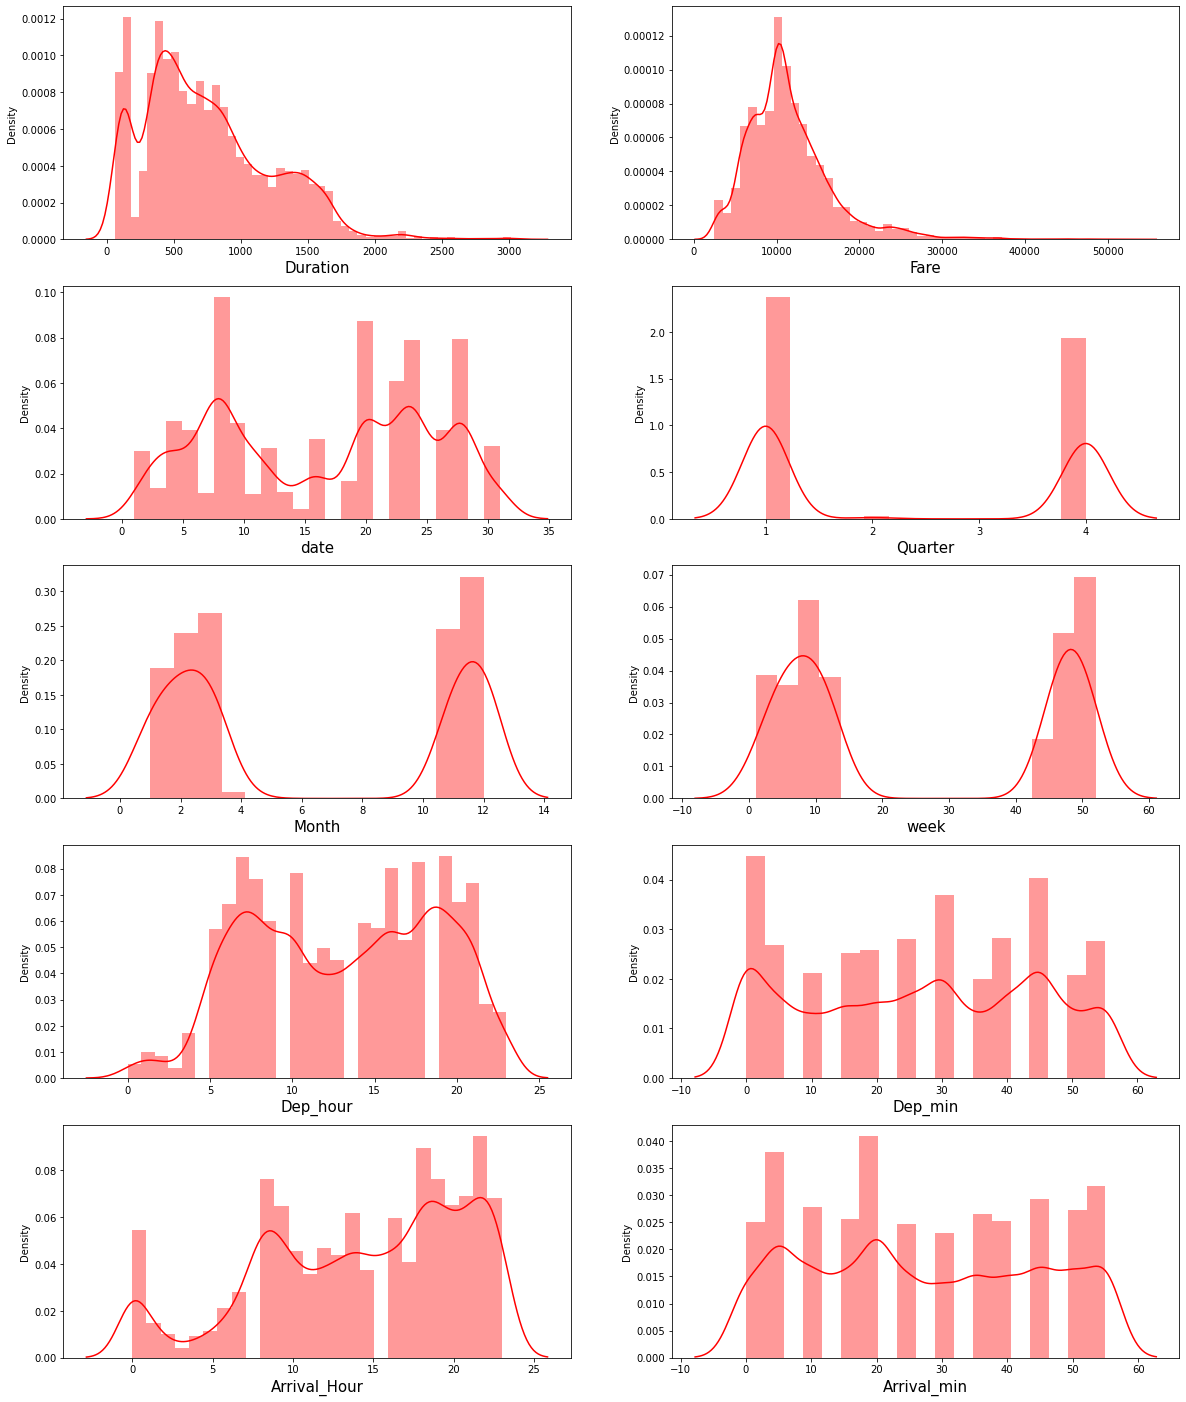

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in num:
    if graph<=len(num):
        ax=plt.subplot(6,2,graph)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

* counting of categories in variables.

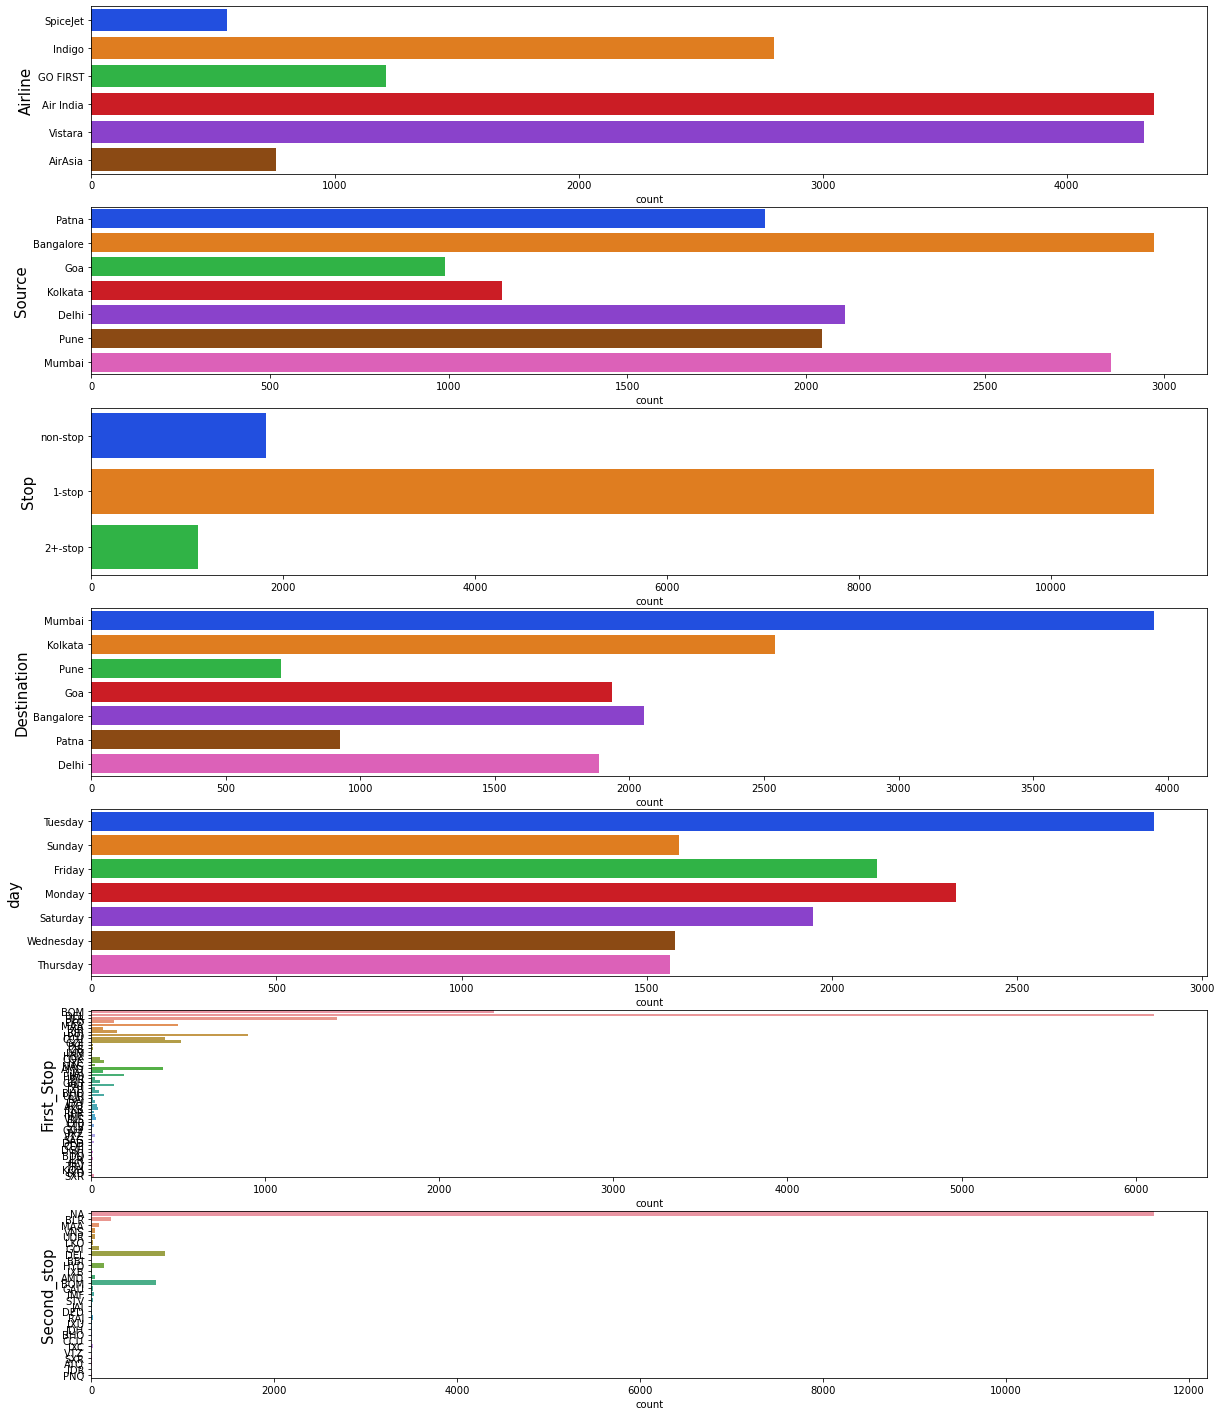

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(20,40))
sns.set_palette('bright')
graph=1

for column in obj:
    if graph<=len(obj):
        ax=plt.subplot(11,1,graph)
        sns.countplot(y=df[column])
        plt.ylabel(column,fontsize=15)
        plt.yticks()
        
    graph+=1
plt.show()
plt.tight_layout()

* Percentage of catergories in variables.

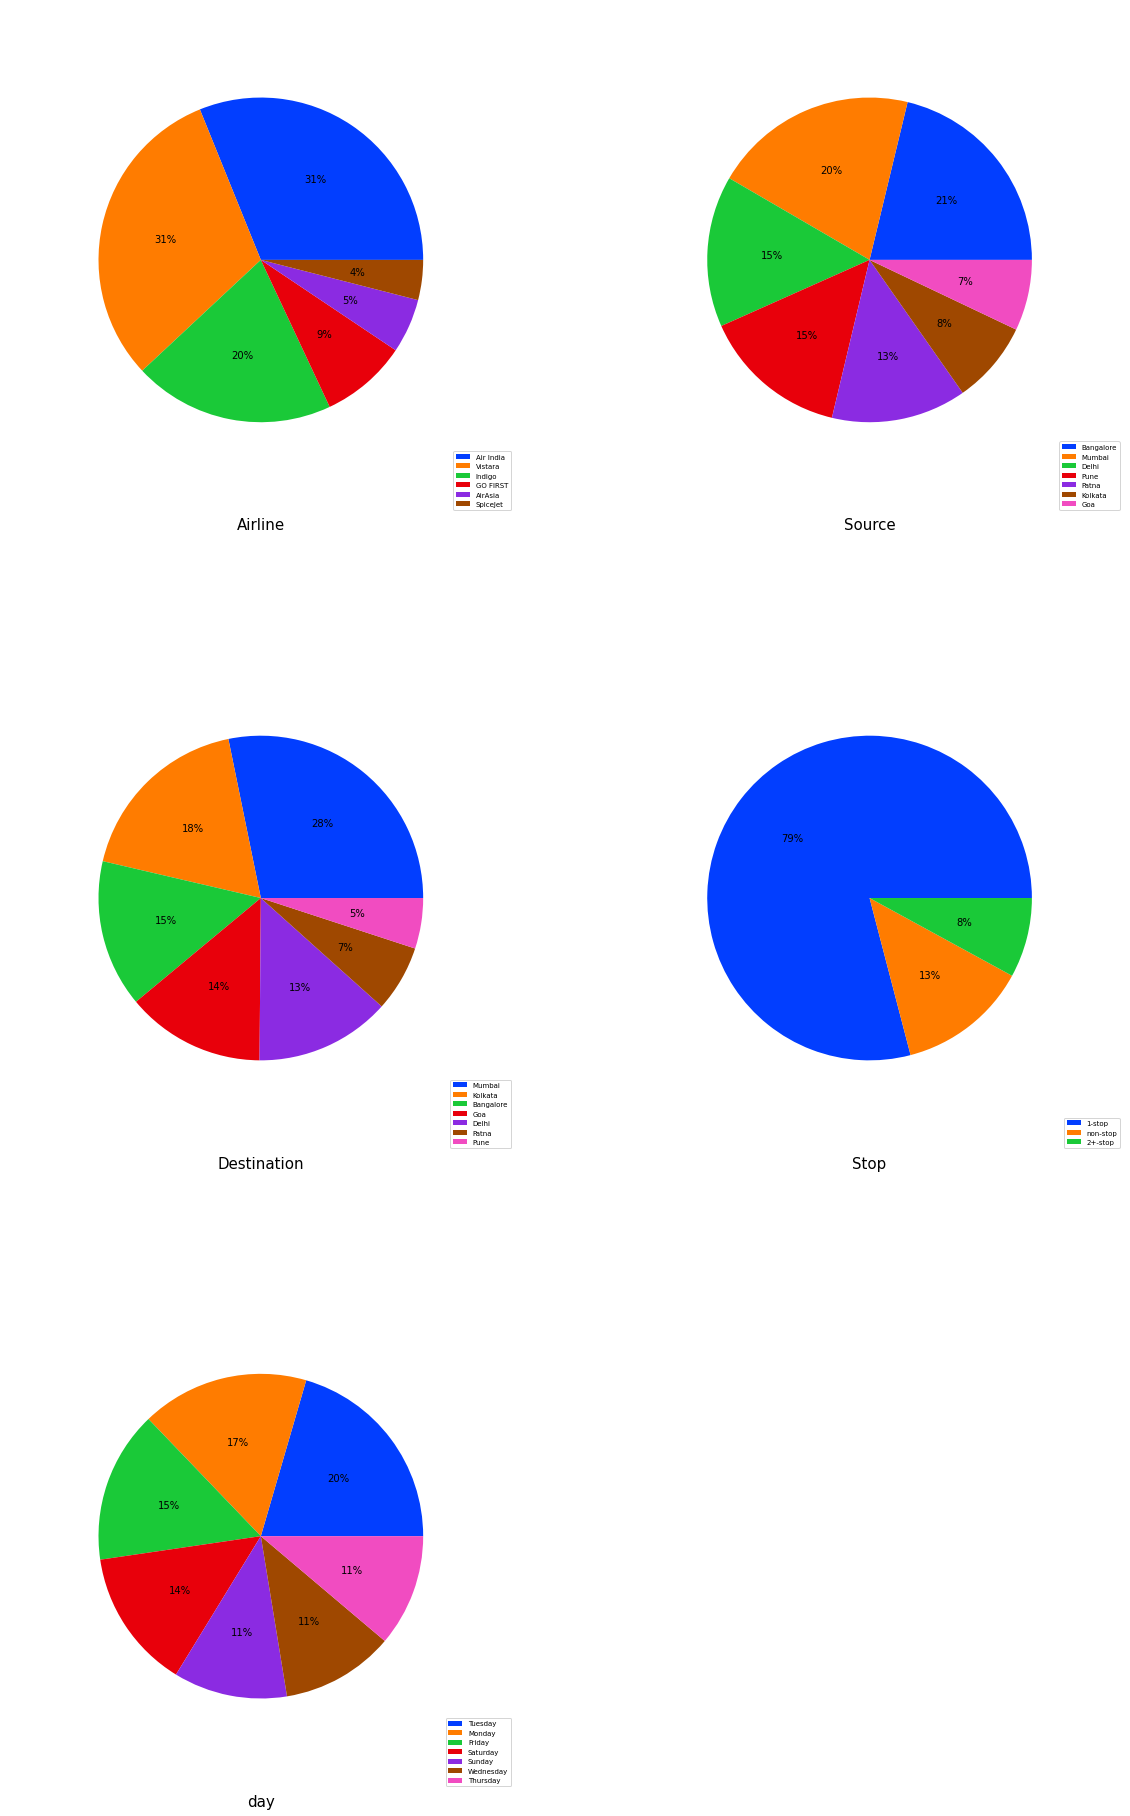

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(20,45))
sns.set_palette('bright')
graph=1
obj1=['Airline','Source','Destination','Stop','day']
for column in obj1:
    if graph<=7:
        ax=plt.subplot(4,2,graph)
        plt.pie(x=df[column].value_counts(),autopct='%0.00f%%',radius=0.8)
        plt.legend(df[column].value_counts().index,loc=4,fontsize=7)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()
plt.tight_layout()

* Above plots exhibits Percentage of categories within feature.

* Analysis of features with GroupBY method

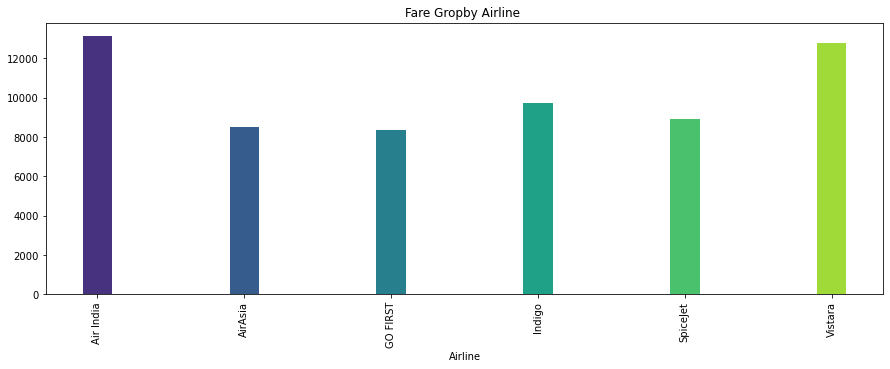

In [49]:
plt.figure(figsize=(15,5))
df.groupby('Airline')['Fare'].mean().plot.bar(color=sns.color_palette('viridis'),width=0.2)
plt.title('Fare Gropby Airline ')
plt.show()

1] Jet AirWays Bussines have highest mean  price 

2] Multiple carriers and Multiple carriers premium  economy has mean price of upto 10k

3] Spicejet has lowest mean Price.

In [50]:
df.columns

Index(['Airline', 'Source', 'Duration', 'Stop', 'Destination', 'Fare', 'date',
       'Quarter', 'Month', 'day', 'week', 'Dep_hour', 'Dep_min',
       'Arrival_Hour', 'Arrival_min', 'First_Stop', 'Second_stop'],
      dtype='object')

* As Maximum categories 16 are in WindDir3pm features so it can be used for dividing dataset into continuous and categorial features.
 
 1] If more than 16 categories in variable it will be continuous in this dataset
    
 2] Else less than 16 categories in variable then it is categorical variable.   

In [51]:
for i in df.columns:
    print(i,":\n")
    print(len(df[i].unique()))
    print('______________________________\n')

Airline :

6
______________________________

Source :

7
______________________________

Duration :

418
______________________________

Stop :

3
______________________________

Destination :

7
______________________________

Fare :

2916
______________________________

date :

24
______________________________

Quarter :

3
______________________________

Month :

6
______________________________

day :

7
______________________________

week :

22
______________________________

Dep_hour :

24
______________________________

Dep_min :

12
______________________________

Arrival_Hour :

24
______________________________

Arrival_min :

12
______________________________

First_Stop :

50
______________________________

Second_stop :

29
______________________________



* Sepration of continuous and Categorical freatures.

In [52]:
cont=[]
cat=[]
for i in df.columns:
    if len(df[i].unique())>100:
        cont.append(i)
        
    else:
        cat.append(i)
        
print(len(cont))
print(cont)
print('-'*30)
print(len(cat))
print(cat)

2
['Duration', 'Fare']
------------------------------
15
['Airline', 'Source', 'Stop', 'Destination', 'date', 'Quarter', 'Month', 'day', 'week', 'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_min', 'First_Stop', 'Second_stop']


* Bivariate Analysis of Feature

1] scatterplot with Duration features.

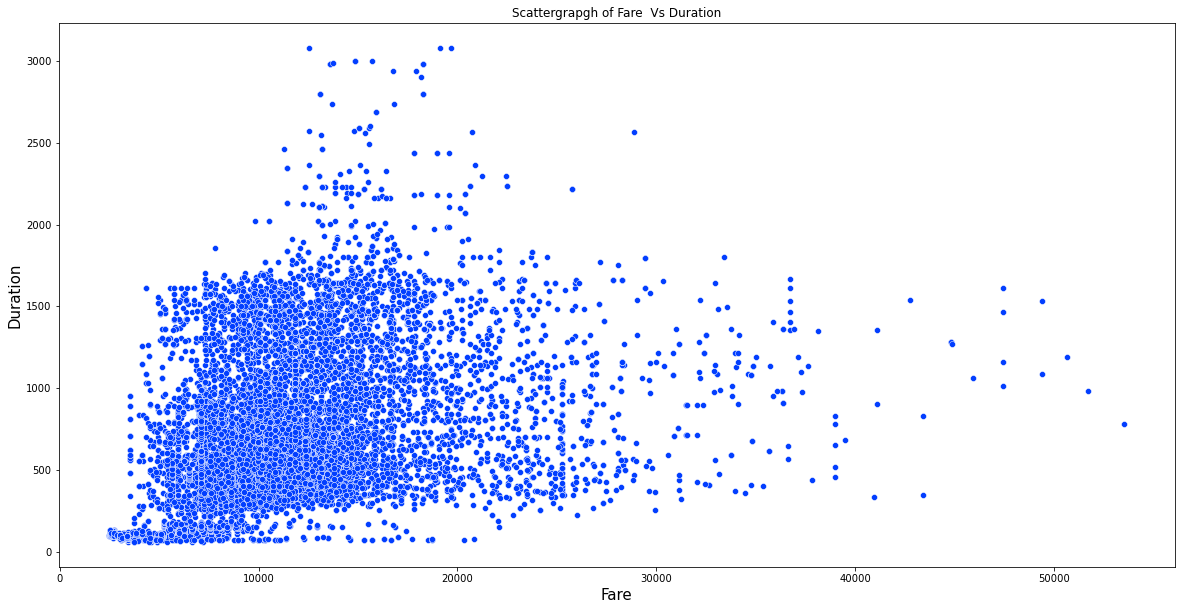

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['Duration'],x=df['Fare'])
plt.xlabel('Fare',fontsize=15)
plt.ylabel('Duration',fontsize=15)
plt.title('Scattergrapgh of Fare  Vs Duration')
plt.show()
plt.tight_layout()

* Flight fare according to timings

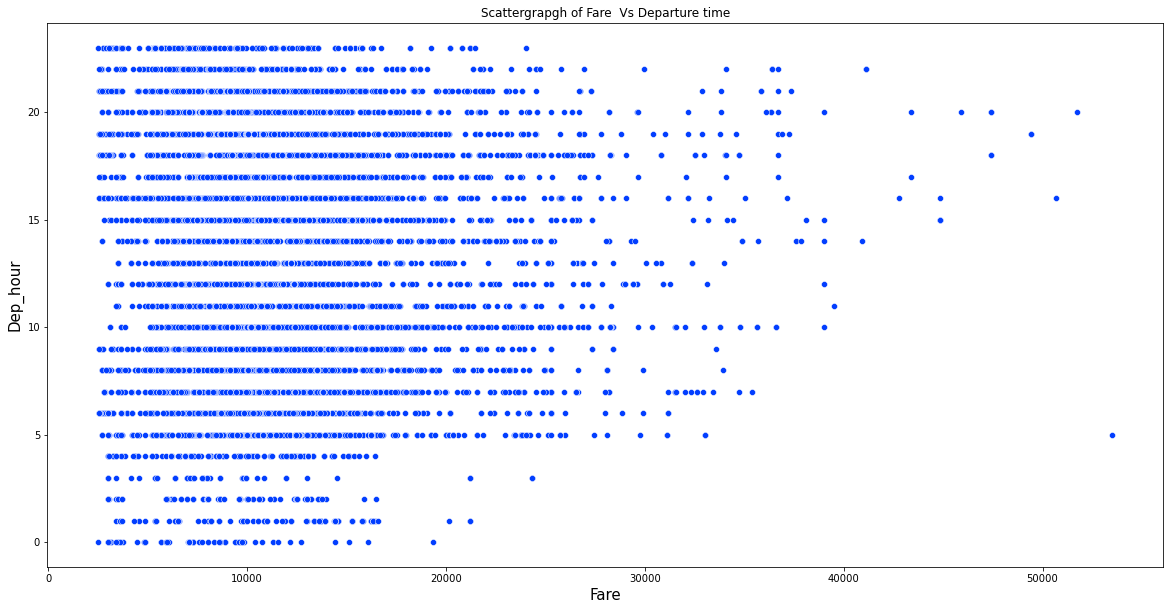

<Figure size 432x288 with 0 Axes>

In [170]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['Dep_hour'],x=df['Fare'])
plt.xlabel('Fare',fontsize=15)
plt.ylabel('Dep_hour',fontsize=15)
plt.title('Scattergrapgh of Fare  Vs Departure time')
plt.show()
plt.tight_layout()

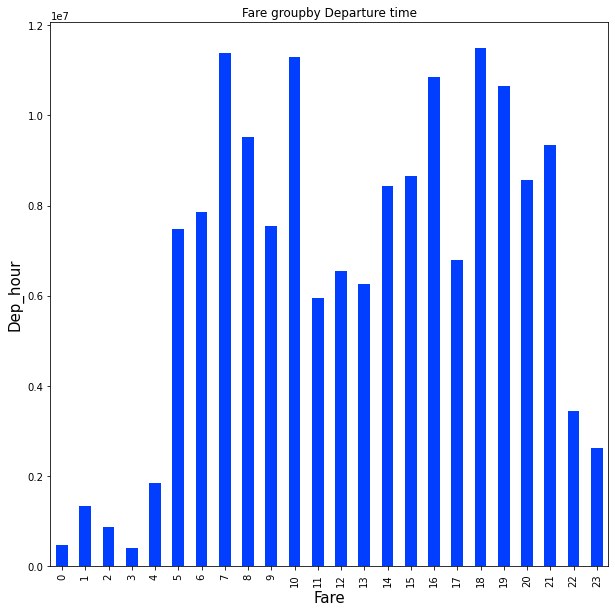

In [169]:
plt.figure(figsize=(10,10))
df['Fare'].groupby(df['Dep_hour']).sum().plot(kind='bar')
plt.xlabel('Fare',fontsize=15)
plt.ylabel('Dep_hour',fontsize=15)
plt.title('Fare groupby Departure time')
plt.show()

* There is no tren or relation ship can be observe in duration and Price of flight.

2] categorical features with Fare

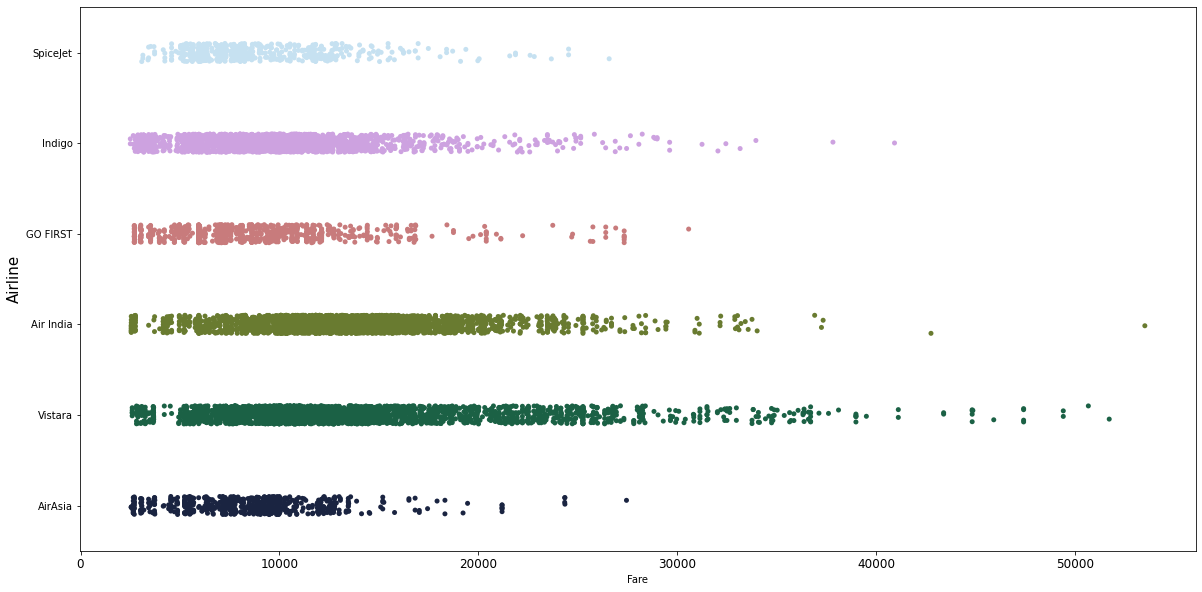

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(20,10))
sns.set_palette('cubehelix_r')
sns.stripplot(y=df['Airline'],x=df['Fare'])
plt.ylabel('Airline',fontsize=15)
plt.xticks(fontsize=12)  
plt.show()
plt.tight_layout()

* ViolinPlot with Airline Categories

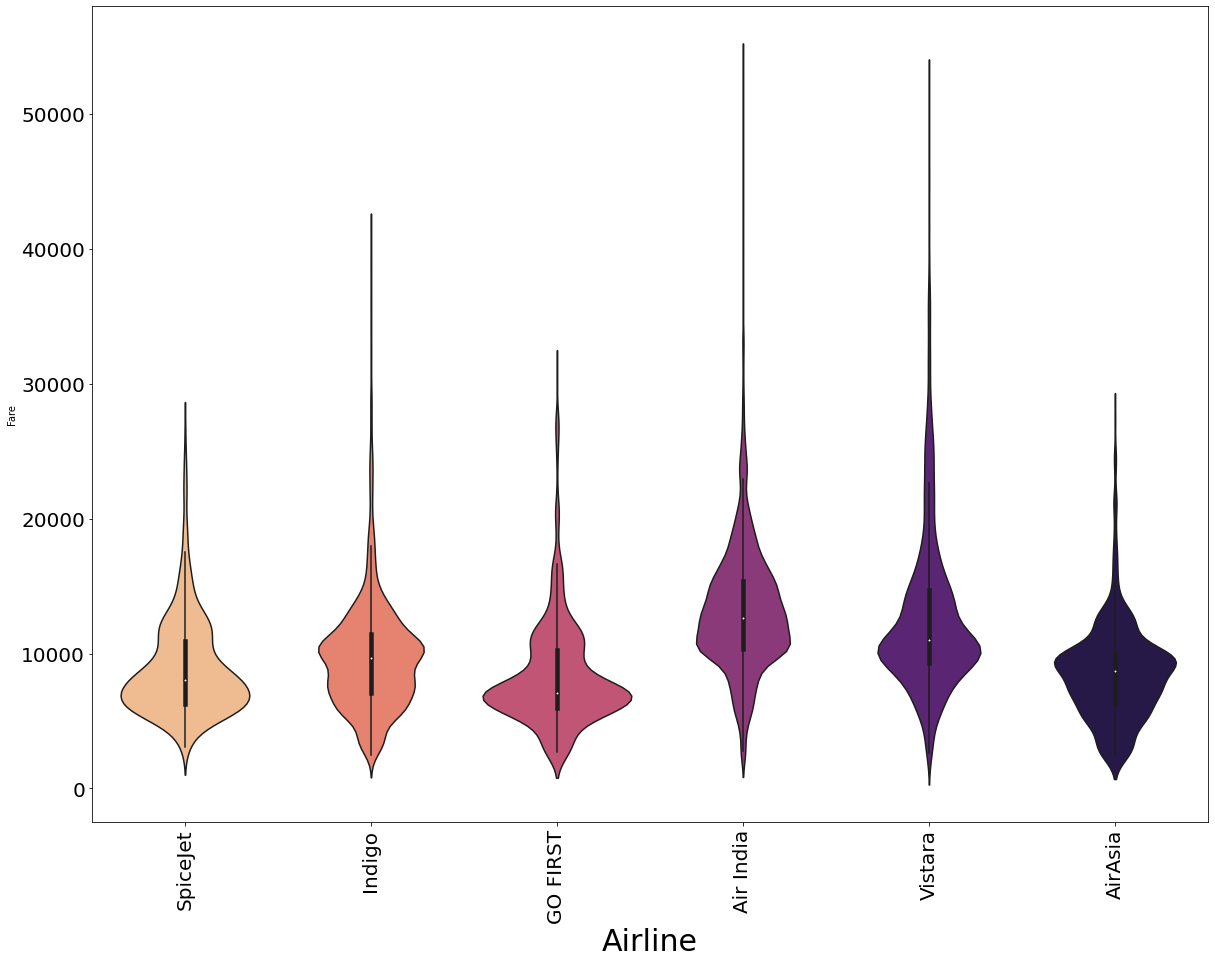

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(20,15))
sns.set_palette('magma_r')
sns.violinplot(x=df['Airline'],y=df['Fare'])
plt.xlabel('Airline',fontsize=30)
plt.xticks(fontsize=20,rotation='90')
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()

1] The distribution of price with Airline companies.

2] jet Airways and jet Airways Bussiness have high amoint of outliers with respect to median of fares respective categories

3] Vistara premium economy and Multiple carriers preium economyhave very less values so there no outliers are observed

* Source with Response Fare

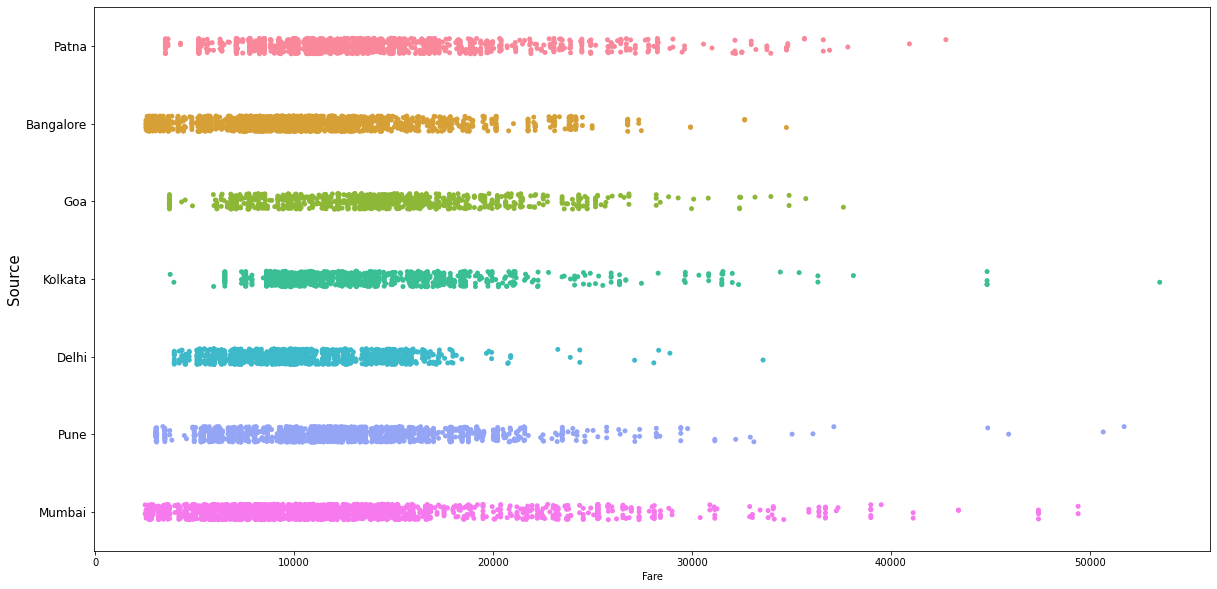

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(20,10))
sns.set_palette('magma_r')
sns.stripplot(y=df['Source'],x=df['Fare'])
plt.ylabel('Source',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

* ViolinPlot with Source Categories

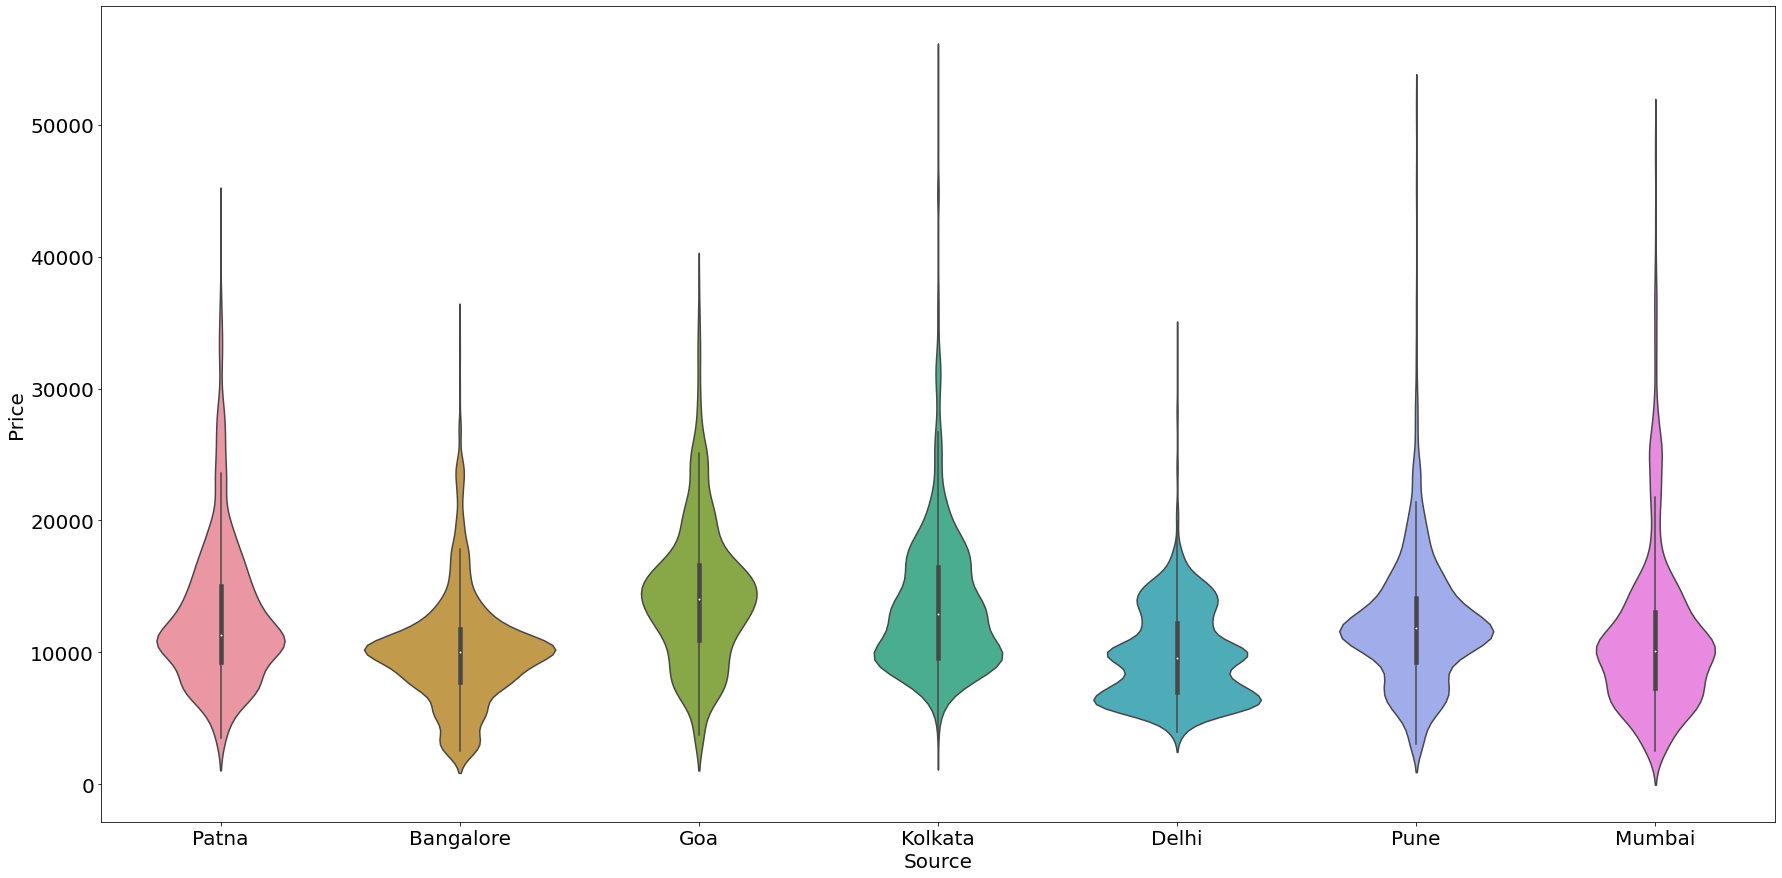

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(30,15))
sns.set_palette('magma_r')
sns.violinplot(x=df['Source'],y=df['Fare'])
plt.xlabel('Source',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()

* Categorical plot with Destination with Price.

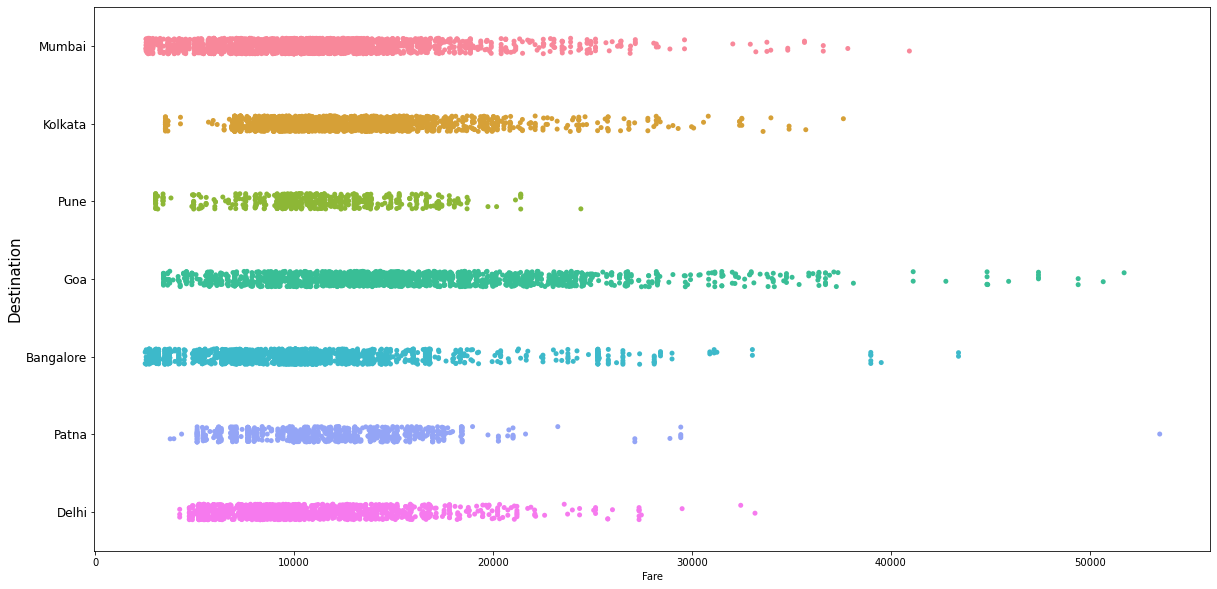

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(20,10))
sns.set_palette('rainbow')
sns.stripplot(y=df['Destination'],x=df['Fare'])
plt.ylabel('Destination',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

* Violin plot of Destination category with Price 

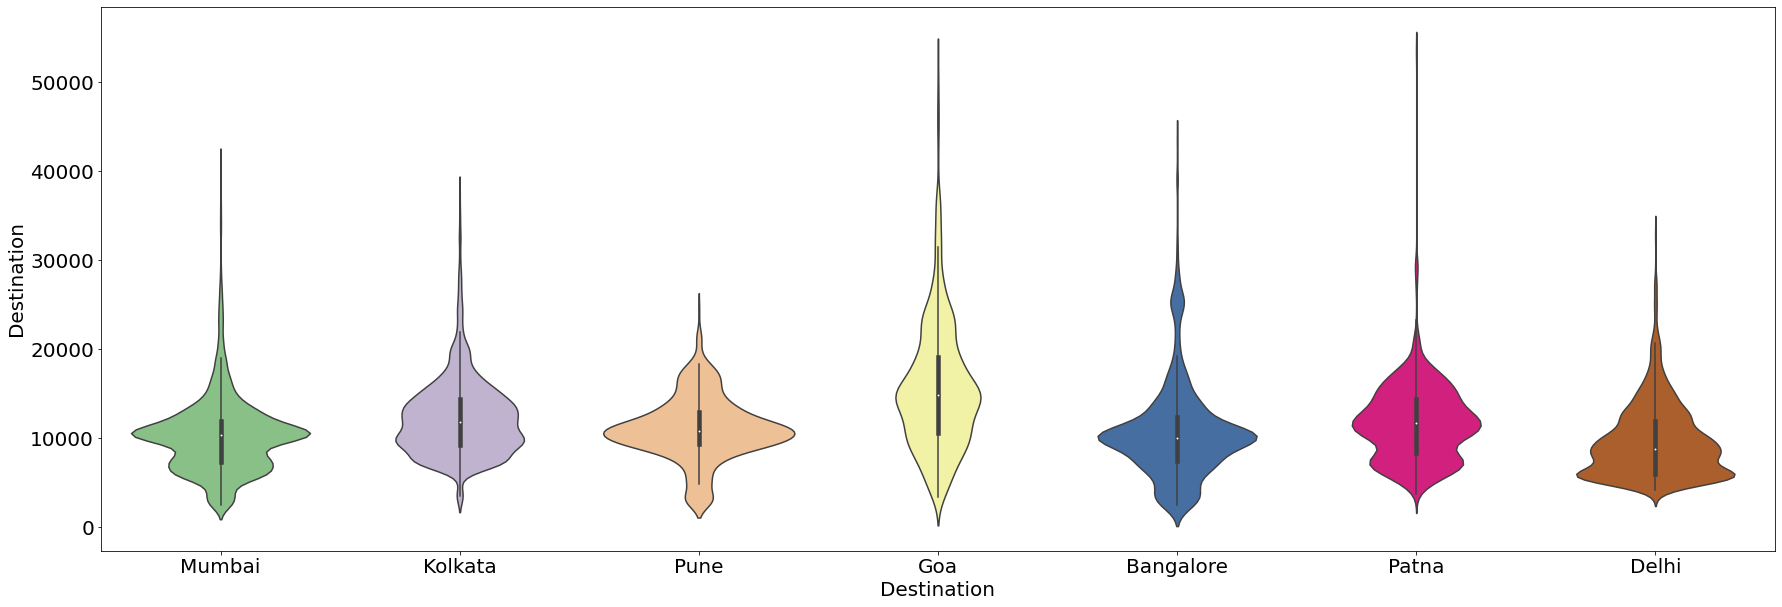

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(30,10))
sns.set_palette('Accent')
sns.violinplot(x=df['Destination'],y=df['Fare'])
plt.xlabel('Destination',fontsize=20)
plt.ylabel('Destination',fontsize=20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  
plt.show()
plt.tight_layout()

* Categorical plot of Total Stops with Price.

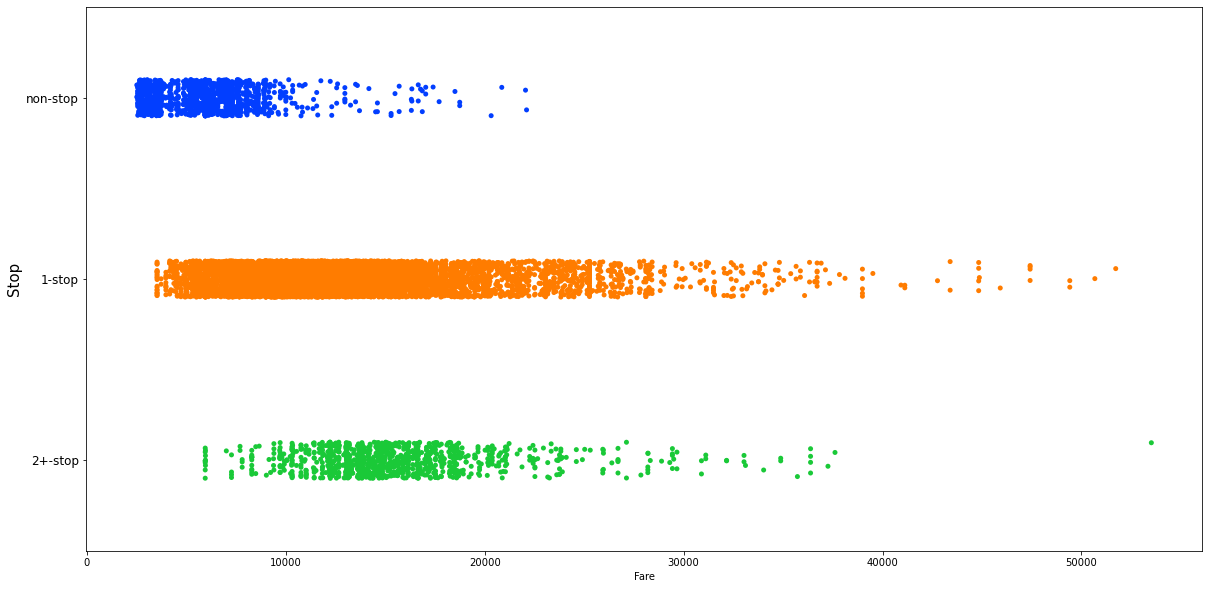

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Stop'],x=df['Fare'])
plt.ylabel('Stop',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

* Violin plot of Total_Stops with Price

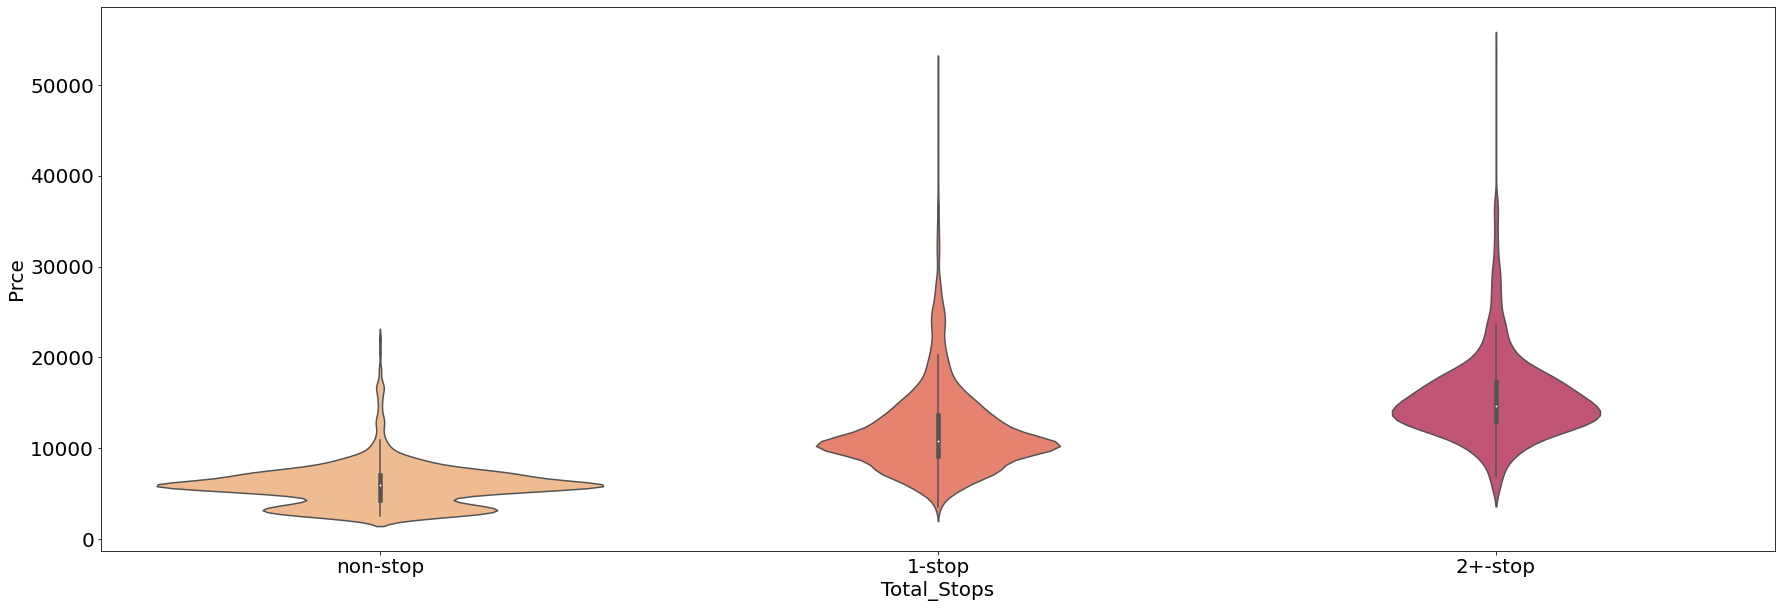

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize=(30,10))
sns.set_palette('magma_r')
sns.violinplot(x=df['Stop'],y=df['Fare'])
plt.xlabel('Total_Stops',fontsize=20)
plt.ylabel('Prce',fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)  
plt.show()
plt.tight_layout()

* Categorical plot of date with Price

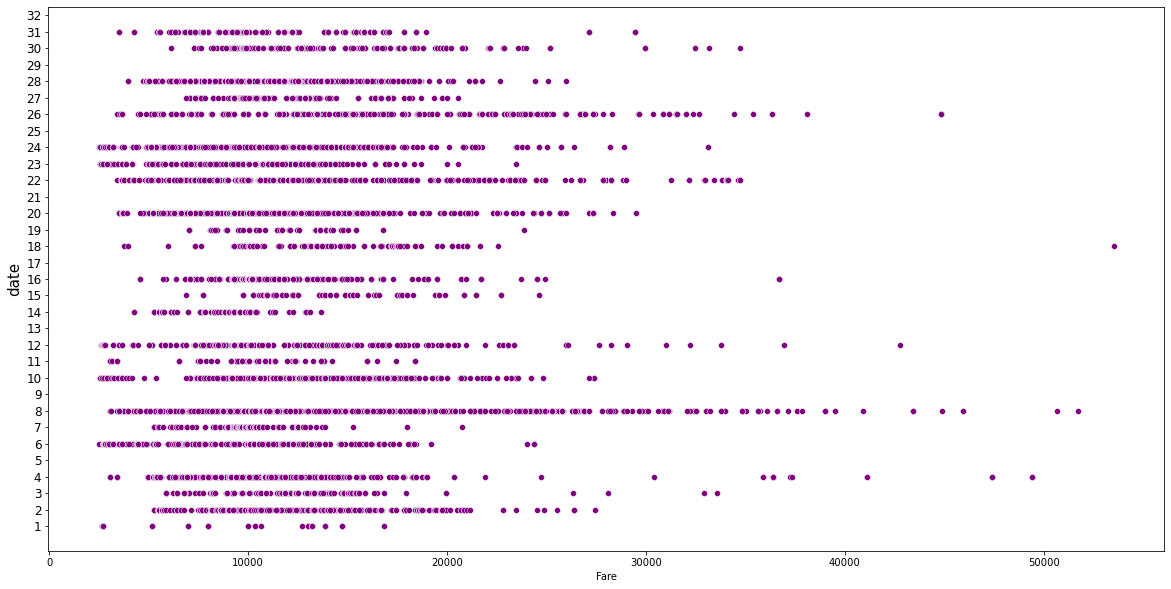

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['date'],x=df['Fare'],color='purple')
plt.ylabel('date',fontsize=15)
plt.yticks(range(1,33),fontsize=12)  
plt.show()
plt.tight_layout()

* CAtegorical plot of Quarte with Price.

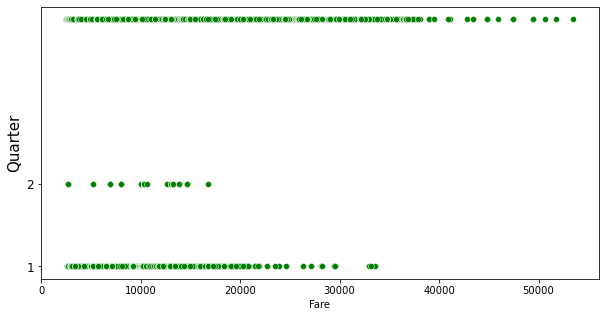

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure(figsize=(10,5))
sns.set_palette('plasma')
sns.scatterplot(y=df['Quarter'],x=df['Fare'],color='g')
plt.ylabel('Quarter',fontsize=15)
plt.yticks([1,2],fontsize=12)  
plt.show()
plt.tight_layout()

* categorical plot of Month with price

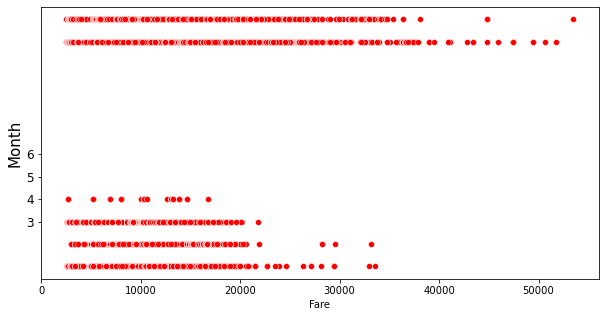

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(10,5))
sns.set_palette('plasma')
sns.scatterplot(y=df['Month'],x=df['Fare'],color='r')
plt.ylabel('Month',fontsize=15)
plt.yticks(range(3,7),fontsize=12)  
plt.show()
plt.tight_layout()

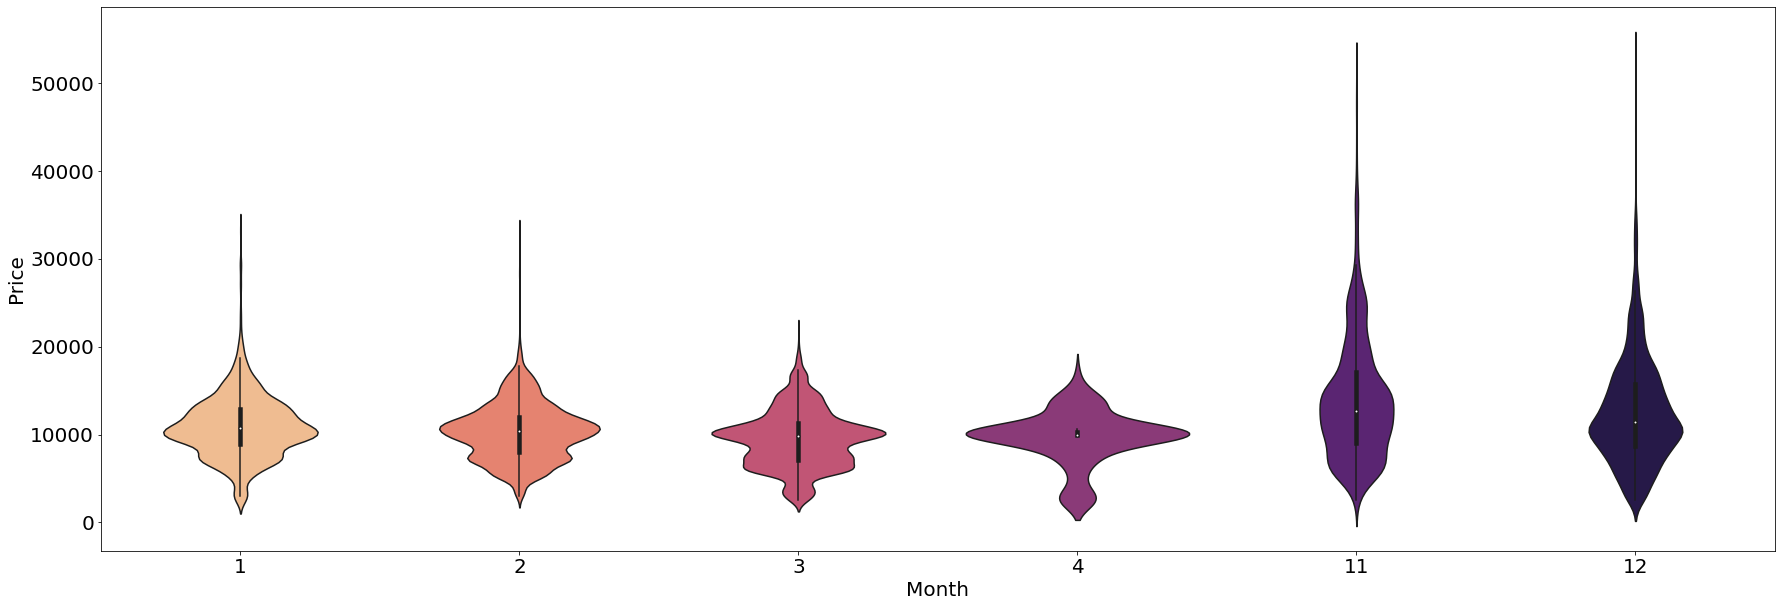

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize=(30,10))
sns.set_palette('magma_r')
sns.violinplot(x=df['Month'],y=df['Fare'])
plt.xlabel('Month',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)  
plt.show()
plt.tight_layout()

* Categorical plot of day with Price.

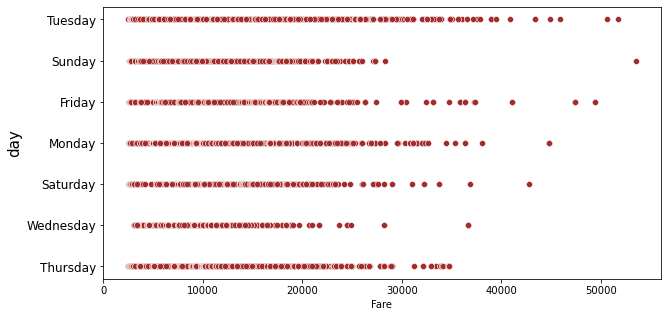

<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize=(10,5))
sns.set_palette('plasma')
sns.scatterplot(y=df['day'],x=df['Fare'],color='brown')
plt.ylabel('day',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

* Categorical plot of week with Price

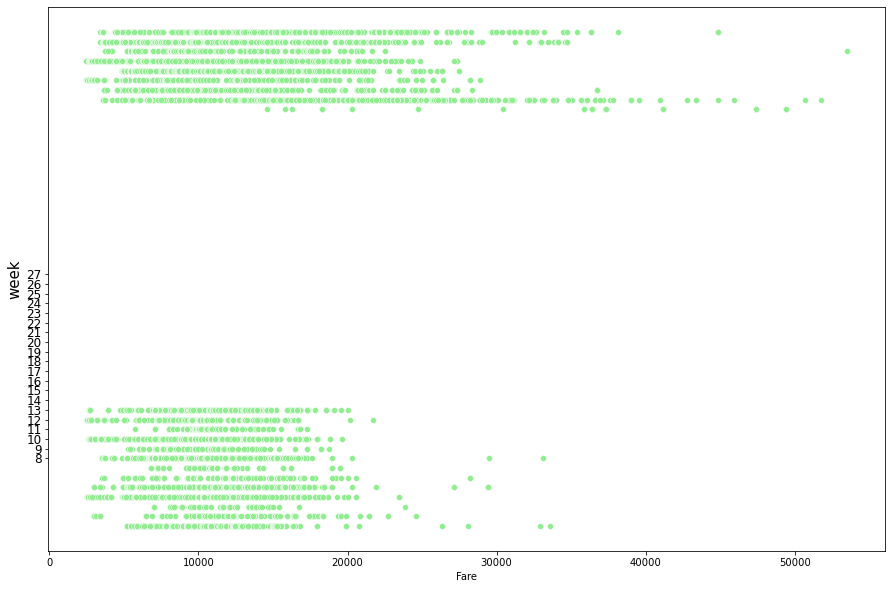

<Figure size 432x288 with 0 Axes>

In [67]:
plt.figure(figsize=(15,10))
sns.set_palette('plasma')
sns.scatterplot(y=df['week'],x=df['Fare'],color='lightgreen')
plt.ylabel('week',fontsize=15)
plt.yticks(range(8,28),fontsize=12)  
plt.show()
plt.tight_layout()

* Unique values in features before Encoding with LabelEncoder

In [68]:
for i in obj:
    print(i,":\n")
    print(df[i].unique())
    print('______________________________\n')

Airline :

['SpiceJet' 'Indigo' 'GO FIRST' 'Air India' 'Vistara' 'AirAsia']
______________________________

Source :

['Patna' 'Bangalore' 'Goa' 'Kolkata' 'Delhi' 'Pune' 'Mumbai']
______________________________

Stop :

['non-stop' '1-stop' '2+-stop']
______________________________

Destination :

['Mumbai' 'Kolkata' 'Pune' 'Goa' 'Bangalore' 'Patna' 'Delhi']
______________________________

day :

['Tuesday' 'Sunday' 'Friday' 'Monday' 'Saturday' 'Wednesday' 'Thursday']
______________________________

First_Stop :

['BOM' 'DEL' 'BLR' 'LKO' 'MAA' 'IXR' 'BBI' 'HYD' 'CCU' 'GOI' 'IXE' 'CJB'
 'IXM' 'HBX' 'COK' 'IXC' 'NAG' 'AMD' 'JAI' 'PNQ' 'IDR' 'GAU' 'PAT' 'IXU'
 'BHO' 'UDR' 'RAJ' 'JDH' 'ATQ' 'IXB' 'RPR' 'IMF' 'VNS' 'DIB' 'STV' 'GOP'
 'IXZ' 'VTZ' 'SAG' 'DED' 'CDP' 'DGH' 'IXJ' 'BDQ' 'JLR' 'CCJ' 'TRV' 'KQH'
 'IXD' 'SXR']
______________________________

Second_stop :

['NA' 'BLR' 'MAA' 'VNS' 'UDR' 'LKO' 'GOI' 'DEL' 'BBI' 'HYD' 'IXB' 'AMD'
 'BOM' 'GAU' 'IMF' 'STV' 'JAI' 'DED' 'RAJ' 'IXU' 'JDH' '

* Encoding variables

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [70]:
for i in obj:
    df[i]=le.fit_transform(df[i])

* Unique values in features after Encoding with LabelEncoder

In [71]:
for i in obj:
    print(i,":\n")
    print(df[i].unique())
    print('______________________________\n')

Airline :

[4 3 2 0 5 1]
______________________________

Source :

[5 0 2 3 1 6 4]
______________________________

Stop :

[2 0 1]
______________________________

Destination :

[4 3 6 2 0 5 1]
______________________________

day :

[5 3 0 1 2 6 4]
______________________________

First_Stop :

[ 6 13  5 36 37 29  2 20  8 17 26 10 28 19 11 24 38  0 32 40 21 16 39 30
  4 47 41 33  1 23 42 22 48 15 44 18 31 49 43 12  9 14 27  3 34  7 46 35
 25 45]
______________________________

Second_stop :

[21  4 20 27 26 19 10  8  2 11 14  0  5  9 13 24 17  7 23 16 18  3  6 15
 28 25  1 12 22]
______________________________



* Analysis of Distribution and Outliers in continuous variables .

1] There are two continuous variables Duration and Price 

2] There will be only analysis on Duration feature as Price is targte feature.

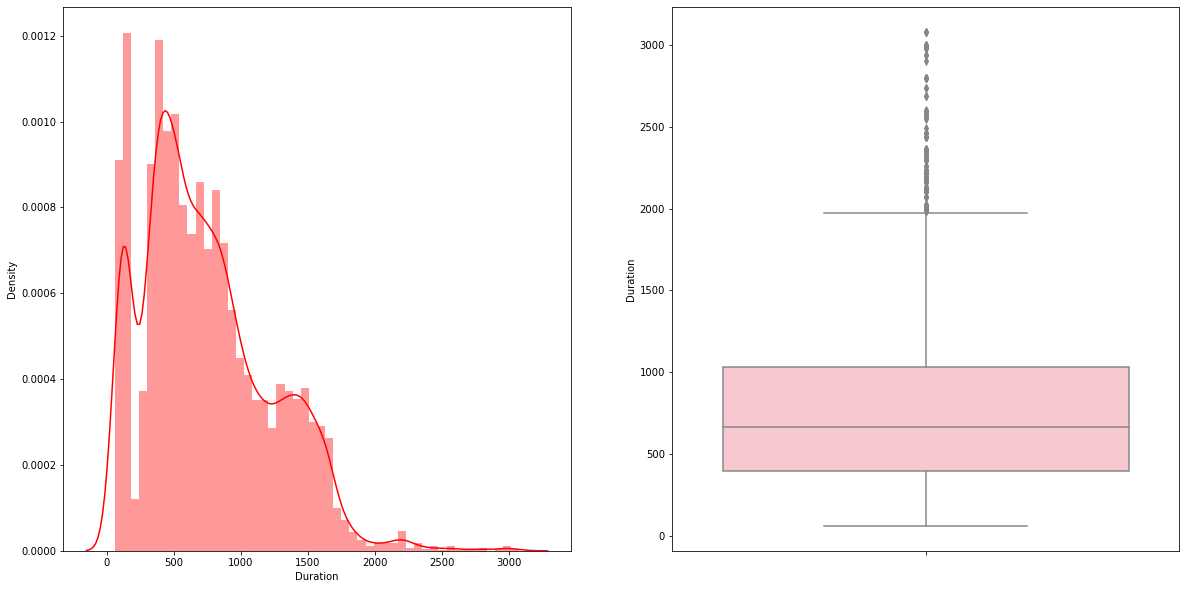

In [72]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df["Duration"],color='red',kde=True,ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['Duration'],color='pink',ax=fig.add_subplot(1,2,2))
plt.show()

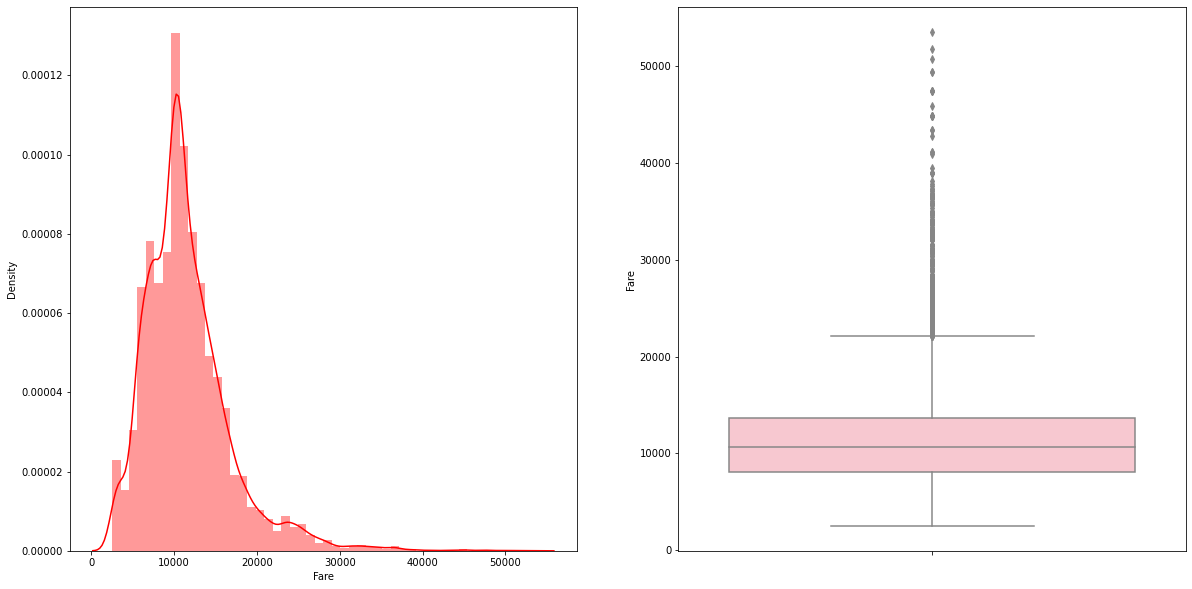

In [73]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df["Fare"],color='red',kde=True,ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['Fare'],color='pink',ax=fig.add_subplot(1,2,2))
plt.show()

* Analyse outliers removal in Continuous feature Duration and data loss 

In [74]:
data=df.copy()
rows_before1=data.shape[0]
rows_before1

14001

In [75]:
from scipy.stats import zscore

z1=np.abs(zscore(data[['Duration']]))
data=data[(z1<3).all(axis=1)]


In [76]:
rows_after1=data.shape[0]
rows_after1

13892

In [77]:

loss1=((rows_before1-rows_after1)/rows_before1)*100
loss1


0.7785158202985502

* Data Loss after removal of outliers is 0.77% so it can be safe to remove outliers with 
  z score method

* Analysis of Distribution of continuous feature before and after outliers removal

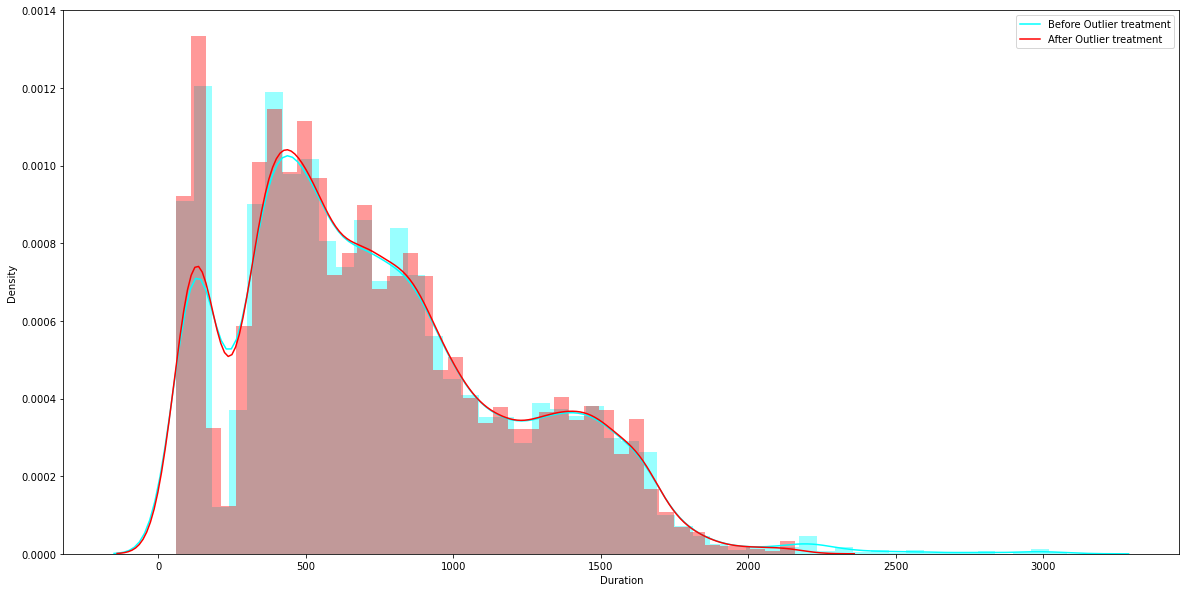

In [78]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['Duration'],color='cyan',kde=True)
sns.distplot(data['Duration'],color='red',kde=True)
plt.legend(['Before Outlier treatment','After Outlier treatment'])
plt.show()

* Lets remove outliers with zscore

In [79]:

df.shape

(14001, 17)

In [80]:
z=np.abs(zscore(df[['Duration']]))
df=df[(z<3).all(axis=1)]


In [81]:
df.shape

(13892, 17)

In [82]:
df.head()

,Airline,Source,Duration,Stop,Destination,Fare,date,Quarter,Month,day,week,Dep_hour,Dep_min,Arrival_Hour,Arrival_min,First_Stop,Second_stop
0,4,5,155,2,4,7091,28,1,2,5,9,21,5,23,40,6,21
1,3,5,175,2,4,7092,28,1,2,5,9,21,5,0,0,6,21
2,2,5,150,2,4,7089,28,1,2,5,9,14,15,16,45,6,21
3,2,5,290,0,4,7091,28,1,2,5,9,12,25,17,15,13,21
4,2,5,310,0,4,7091,28,1,2,5,9,11,20,16,30,13,21


* Correlation Analysis of variables

In [83]:
cor=df.corr().abs()

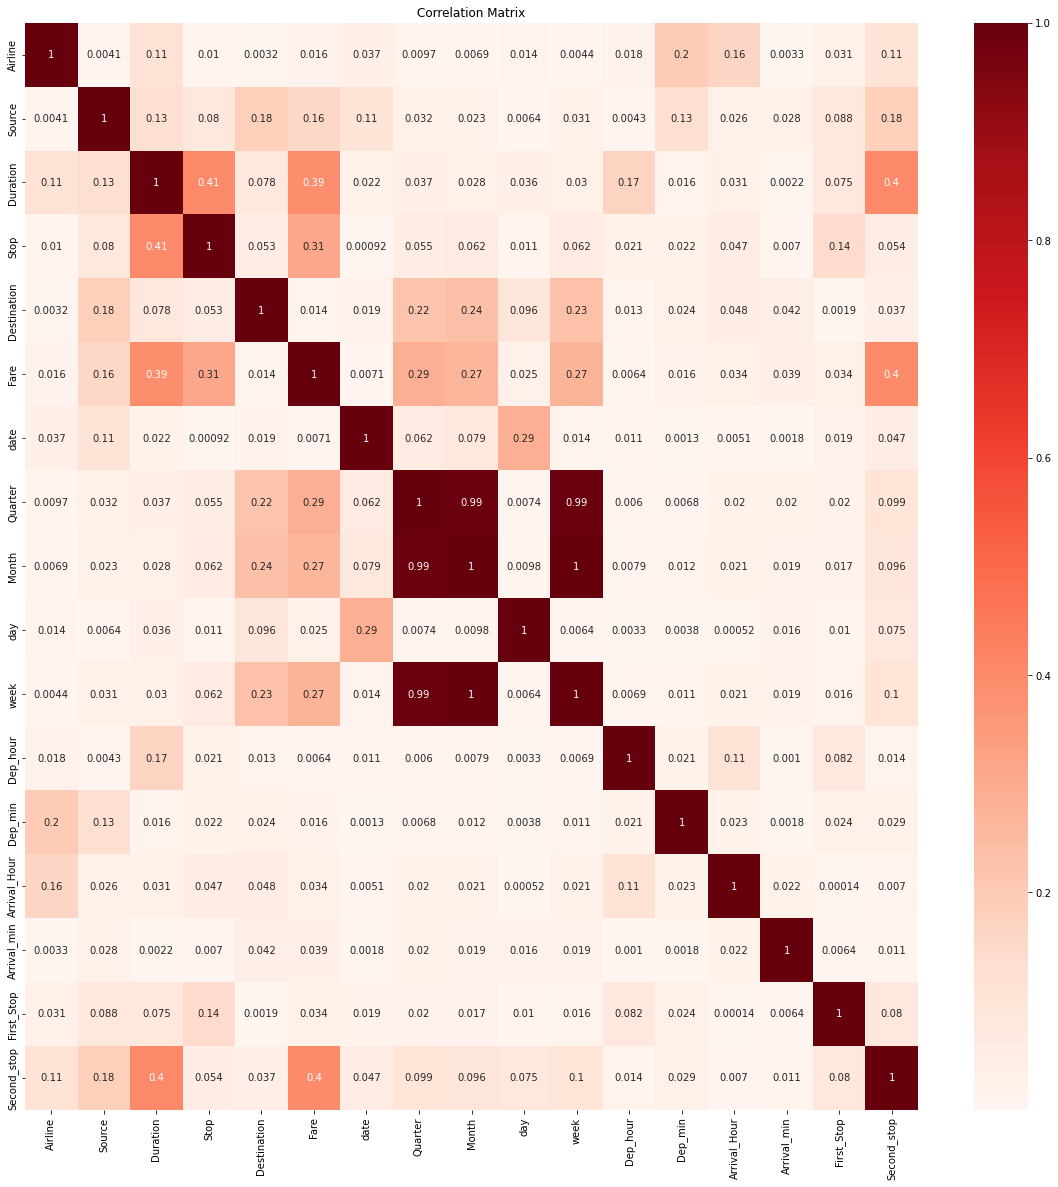

In [84]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

* Months with week .

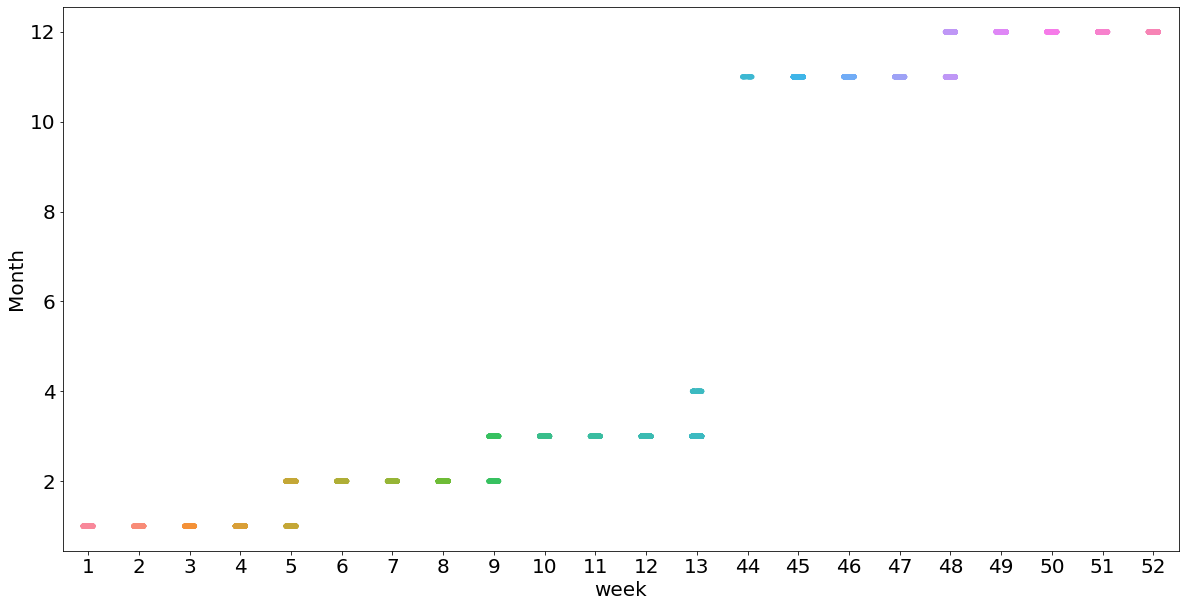

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Month'],x=df['week'])
plt.ylabel("Month",fontsize=20)
plt.xlabel("week",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

* Quarter with week

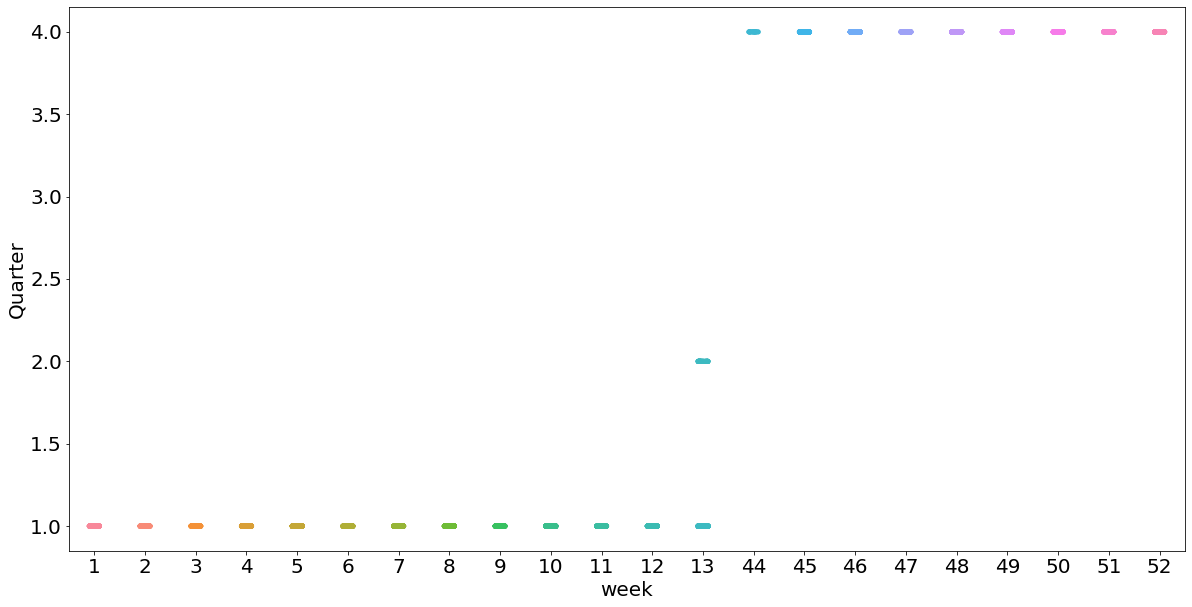

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize=(20,10))
sns.stripplot(y=df['Quarter'],x=df['week'])
plt.ylabel("Quarter",fontsize=20)
plt.xlabel("week",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

* MOnth with Quarter 

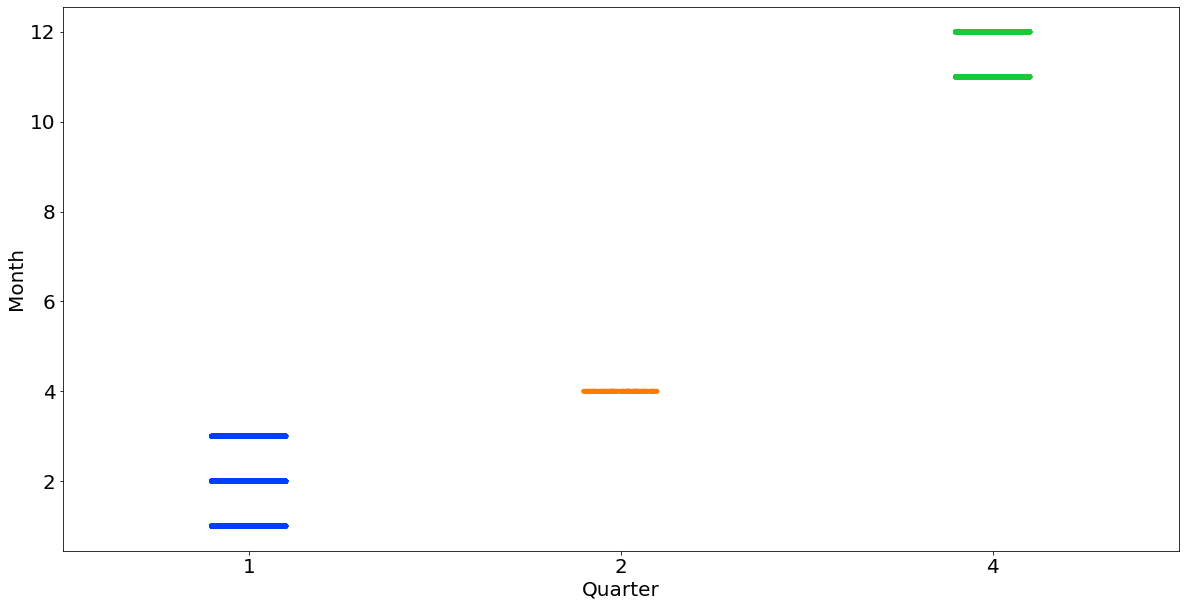

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Month'],x=df['Quarter'])
plt.ylabel("Month",fontsize=20)
plt.xlabel("Quarter",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

* Duration with Total_Stops.

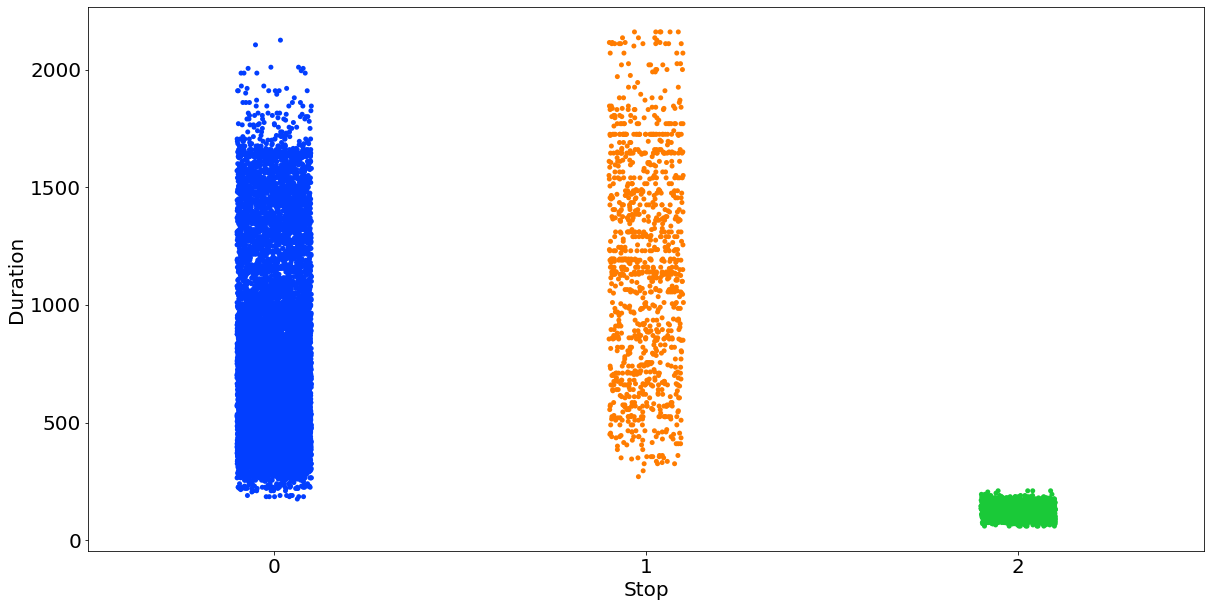

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Duration'],x=df['Stop'])
plt.ylabel("Duration",fontsize=20)
plt.xlabel("Stop",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

* Correlation with Price label

In [89]:
cor_label=(df.drop('Fare',axis=1)).corrwith(df['Fare']).abs()
cor_label

Airline         0.016312
Source          0.156111
Duration        0.391382
Stop            0.310797
Destination     0.013778
date            0.007139
Quarter         0.287918
Month           0.269017
day             0.024980
week            0.271761
Dep_hour        0.006386
Dep_min         0.016275
Arrival_Hour    0.034038
Arrival_min     0.038988
First_Stop      0.033681
Second_stop     0.398048
dtype: float64

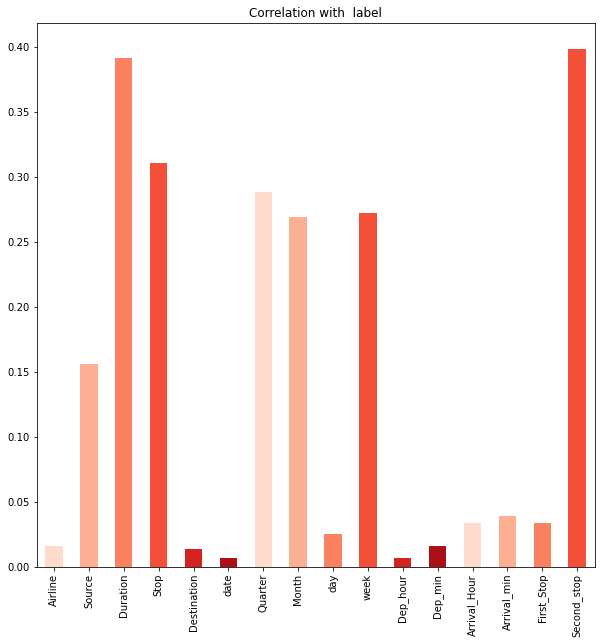

In [90]:
plt.figure(figsize=(10,10))
cor_label.plot(kind="bar",color=sns.color_palette('Reds'))
plt.title("Correlation with  label")
plt.show()

* Analyse Multicollinearity with Variance Inflation Factor,Threshold for vif score is defined as 10 


In [91]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

Predictors1=df.drop(columns=['Fare'],axis=1)
predictor1=Predictors1.to_numpy()

VIF1=pd.DataFrame()
VIF1["Features"]=Predictors1.columns
VIF1["vif_scores"]=[variance_inflation_factor(predictor1,i) for i in range(Predictors1.shape[1])]
VIF1.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
7,Month,3400.819854
9,week,3058.252261
6,Quarter,167.548072
5,date,23.006035
15,Second_stop,18.035520
10,Dep_hour,6.823040
12,Arrival_Hour,6.159304
2,Duration,5.746238
4,Destination,3.874310
11,Dep_min,3.469558


* Analyse vif score after eliminating Month

In [92]:
Predictors2=df.drop(columns=['Fare','Month'],axis=1)
predictor2=Predictors2.to_numpy()
VIF2=pd.DataFrame()
VIF2["Features"]=Predictors2.columns
VIF2["vif_scores"]=[variance_inflation_factor(predictor2,i) for i in range(Predictors2.shape[1])]
VIF2.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
6,Quarter,161.253080
8,week,123.120365
14,Second_stop,12.186984
9,Dep_hour,6.590554
11,Arrival_Hour,5.818097
5,date,4.998919
2,Duration,4.998473
4,Destination,3.730975
10,Dep_min,3.429753
12,Arrival_min,3.296558


* Analyse vif score after eliminating Quarter

In [93]:
Predictors3=df.drop(columns=['Fare','Month','Quarter'],axis=1)
predictor3=Predictors3.to_numpy()
VIF3=pd.DataFrame()
VIF3["Features"]=Predictors3.columns
VIF3["vif_scores"]=[variance_inflation_factor(predictor3,i) for i in range(Predictors3.shape[1])]
VIF3.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
13,Second_stop,11.177265
8,Dep_hour,6.556564
10,Arrival_Hour,5.773454
2,Duration,4.809660
5,date,4.647714
4,Destination,3.598411
9,Dep_min,3.413658
11,Arrival_min,3.274839
6,day,3.248787
12,First_Stop,3.000692


* Analyse vif score after eliminating second_dtop

In [94]:
Predictors4=df.drop(columns=['Fare','Month','Quarter','Second_stop'],axis=1)
predictor4=Predictors4.to_numpy()
VIF4=pd.DataFrame()
VIF4["Features"]=Predictors4.columns
VIF4["vif_scores"]=[variance_inflation_factor(predictor4,i) for i in range(Predictors4.shape[1])]
VIF4.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
8,Dep_hour,5.922060
10,Arrival_Hour,5.442153
2,Duration,4.582050
5,date,4.396082
4,Destination,3.460516
9,Dep_min,3.384258
11,Arrival_min,3.165975
6,day,2.987634
1,Source,2.928270
12,First_Stop,2.851023


* Analyse vif score after eliminating Dep_hour

In [95]:
Predictors5=df.drop(columns=['Fare','Month','Quarter','Second_stop','Dep_hour'],axis=1)
predictor5=Predictors5.to_numpy()
VIF5=pd.DataFrame()
VIF5["Features"]=Predictors5.columns
VIF5["vif_scores"]=[variance_inflation_factor(predictor5,i) for i in range(Predictors5.shape[1])]
VIF5.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
9,Arrival_Hour,5.441014
5,date,4.279256
2,Duration,4.159788
4,Destination,3.383775
8,Dep_min,3.355428
10,Arrival_min,3.130868
1,Source,2.915821
6,day,2.905400
11,First_Stop,2.833989
0,Airline,2.716389


* Analyse vif score after eliminating arrival_hour

In [96]:
Predictors6=df.drop(columns=['Fare','Month','Quarter','Second_stop','Dep_hour','Arrival_Hour'],axis=1)
predictor6=Predictors6.to_numpy()
VIF6=pd.DataFrame()
VIF6["Features"]=Predictors6.columns
VIF6["vif_scores"]=[variance_inflation_factor(predictor6,i) for i in range(Predictors6.shape[1])]
VIF6.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
5,date,4.175587
2,Duration,4.037378
8,Dep_min,3.341140
4,Destination,3.263938
9,Arrival_min,3.108575
1,Source,2.905405
6,day,2.828733
10,First_Stop,2.784323
0,Airline,2.554551
7,week,2.530103


* It is required to remove 5 feature s from dataset to handle issue of Multicollinearity which causes model performance.

* Analysis for Skewness in  continuous features features.


In [97]:
df[['Duration']].skew()

Duration    0.574619
dtype: float64

* Analysis with various transformation to remove skewness in Duration feature which is only continuous feature..

In [98]:
data=df.copy()

In [99]:
from sklearn.preprocessing import PowerTransformer
transform1=pd.DataFrame()
pwr1=PowerTransformer(method='box-cox')
transform1[['Duration']]=pwr1.fit_transform(data[['Duration']])
transform1[['Duration']].skew()

Duration   -0.094455
dtype: float64

* Sqaure root transformation

In [100]:
transform2=pd.DataFrame()
transform2=np.sqrt(data[['Duration']])
transform2.skew()


Duration   -0.045023
dtype: float64

* Cuberoot transformation

In [101]:
transform3=pd.DataFrame()
transform3=np.log(data[['Duration']])
transform3.skew()

Duration   -0.804627
dtype: float64

* Power Transformation with yeo-johnson

In [102]:

transform4=pd.DataFrame()
pwr2=PowerTransformer(method='yeo-johnson')
transform4[['Duration']]=pwr2.fit_transform(data[['Duration']])
transform4[['Duration']].skew()

Duration   -0.093975
dtype: float64

* Out of all above transformation Power Transformer with yeo-johnson works betterr.

Lets transform Duration feature  with Power Transformer with yeo-johnson

In [103]:
power=PowerTransformer('yeo-johnson')
df[['Duration']]=power.fit_transform(df[['Duration']])

* Analyse skewness after transformation.

In [104]:
df[['Duration']].skew()

Duration   -0.093975
dtype: float64

* Skewness has been removed from features can be observed from graph

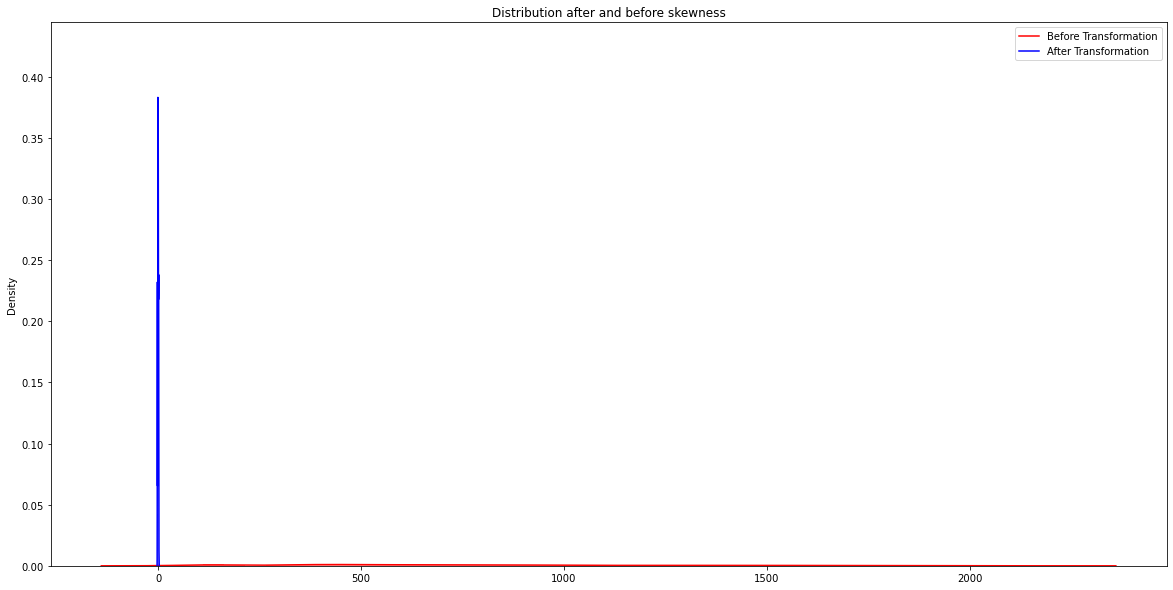

In [105]:

    
fig=plt.figure(figsize=(20,10))
sns.distplot(data[['Duration']],color='red',kde=True)
sns.distplot(df[['Duration']],color='blue',kde=True)
plt.title('Distribution after and before skewness')
plt.legend(['Before Transformation','After Transformation'])
plt.show()   
    

* Skewness has been removed from dataset.

* Splitting dataset into feature and label

In [106]:
x1=df.drop('Fare',axis=1)
y1=df.Fare

In [107]:
print('x1 shape is ',x1.shape)
print('y1 shape is ',y1.shape)

x1 shape is  (13892, 16)
y1 shape is  (13892,)


* Standadization of features.

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x1)

In [109]:
x_scaled.shape

(13892, 16)

1] As feature have less correlation with label hence to handle this scenario of low correlation to extract highly correlated data  from features PCA can be effective solution.

2] PCA analysis can give eigenvalues and eigenvecotors which will handle Multicollinearity in highky effective way. 

In [110]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[-1.54775633e+00,  1.87181966e+00,  1.58277094e+00, ...,
         2.46492635e-01, -3.96942210e-03,  6.54307682e-03],
       [-1.50937152e+00,  1.73789145e+00,  2.73668826e+00, ...,
         3.53906647e-01,  5.40068040e-04,  6.88488304e-03],
       [-1.51560251e+00,  1.90569679e+00,  1.88678471e+00, ...,
         3.65447292e-01, -4.19521803e-03,  6.45462759e-03],
       ...,
       [ 2.09141498e+00, -2.72419915e+00,  7.14527026e-01, ...,
        -7.12443945e-01,  1.14378361e-01, -1.00473243e-02],
       [ 2.09141498e+00, -2.72419915e+00,  7.14527026e-01, ...,
        -7.12443945e-01,  1.14378361e-01, -1.00473243e-02],
       [ 2.09581133e+00, -2.82866153e+00,  5.95951552e-01, ...,
        -4.59459583e-01,  1.12760542e-01, -1.01079266e-02]])

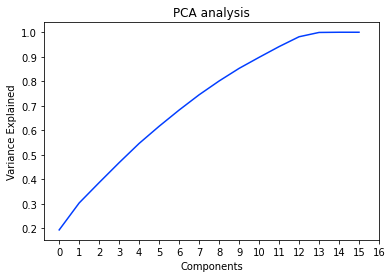

In [111]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.title('PCA analysis')
plt.xticks(range(0,17))
plt.show()

In [112]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.193131
1     0.303200
2     0.386293
3     0.467728
4     0.546205
5     0.616230
6     0.682371
7     0.744676
8     0.801007
9     0.852458
10    0.897520
11    0.941304
12    0.981567
13    0.999165
14    0.999994
15    1.000000
dtype: float64

* The 13 components of PCA explains 98.16 % variance which willbe used for model building

In [113]:
pca1=PCA(n_components=13)
dim1=pca1.fit_transform(x_scaled)
x_dim1=pd.DataFrame(dim1,columns=[('PC{}').format(i) for i in range(1,14)])
x_dim1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1.547756,1.871820,1.582771,-0.862212,0.754656,-0.930610,0.239514,-0.873174,-1.508426,1.834280,-0.102911,2.148168,0.171900
1,-1.509372,1.737891,2.736688,0.424856,1.862782,-0.263002,-0.382004,1.834221,-0.386084,-0.023994,0.636019,2.217033,-0.628678
2,-1.515603,1.905697,1.886785,-0.395543,0.966514,-0.124971,0.593812,-1.165232,-0.412978,0.692747,-0.651320,1.911573,0.078279
3,-1.712802,0.192742,0.236323,-0.417537,-0.034649,0.642511,0.639338,0.643313,-0.495986,0.063501,-0.971027,1.575886,-0.141210
4,-1.691486,0.204399,0.238086,-0.188291,-0.021178,0.824971,0.512862,-0.196491,-0.475559,-0.040977,-0.790424,1.718902,-0.129857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13887,2.091415,-2.724199,0.714527,1.126703,0.834877,-0.419446,0.866896,-1.241462,-0.062839,1.346882,0.866019,-0.280720,0.683474
13888,2.095811,-2.828662,0.595952,1.106893,0.680623,-0.307390,1.189657,-1.356669,0.049962,1.061032,0.868562,-0.317107,0.561870
13889,2.091415,-2.724199,0.714527,1.126703,0.834877,-0.419446,0.866896,-1.241462,-0.062839,1.346882,0.866019,-0.280720,0.683474
13890,2.091415,-2.724199,0.714527,1.126703,0.834877,-0.419446,0.866896,-1.241462,-0.062839,1.346882,0.866019,-0.280720,0.683474


In [114]:
x_dim1.shape

(13892, 13)

In [115]:
y1.shape

(13892,)

* Training algorithms 

In [116]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score 
from sklearn.model_selection import cross_val_score

* spliting dataset into train test set

In [117]:
maxR2=0
maxRn=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_dim1,y1,test_size=0.2,random_state=i)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    r2=regr.score(x_test,y_test)
    print("R squared ",r2,'Random sate ',i)
    
    if r2>maxR2:
        maxR2=r2
        maxRn=i
        print("R-squared",maxR2,"random_state",i)
        

R squared  0.3358928083527465 Random sate  1
R-squared 0.3358928083527465 random_state 1
R squared  0.34698554103731405 Random sate  2
R-squared 0.34698554103731405 random_state 2
R squared  0.34870562800630756 Random sate  3
R-squared 0.34870562800630756 random_state 3
R squared  0.33635573179901423 Random sate  4
R squared  0.32854886642583103 Random sate  5
R squared  0.3538645283614258 Random sate  6
R-squared 0.3538645283614258 random_state 6
R squared  0.3584171446826552 Random sate  7
R-squared 0.3584171446826552 random_state 7
R squared  0.3585371972739543 Random sate  8
R-squared 0.3585371972739543 random_state 8
R squared  0.3350874784203274 Random sate  9
R squared  0.3614244789606178 Random sate  10
R-squared 0.3614244789606178 random_state 10
R squared  0.3510694443698923 Random sate  11
R squared  0.34096156412866463 Random sate  12
R squared  0.33727666656389 Random sate  13
R squared  0.3653097323680603 Random sate  14
R-squared 0.3653097323680603 random_state 14
R squa

In [118]:
print("Maximum R squared obtained  is ",maxR2,'at random state',maxRn) 

Maximum R squared obtained  is  0.3789259062438143 at random state 165


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x_dim1,y1,test_size=0.20,random_state=165)

In [120]:
def Reg_eval(regr,x_train,y_train,x_test,y_test,train=True):
    if train==True:
        print('********** Training Evaluation *******************')
        ytrain_pred=regr.predict(x_train)
        
        R2_train=r2_score(y_train,ytrain_pred)
       
        RMSE_train=np.sqrt(mean_squared_error(y_train,ytrain_pred))
        print("\nThe R squared for {0}  for Train data  is {1} ".format(str(regr),R2_train))
        print("\nThe Root mean squared error for {0}  for Train data is {1} ".format(str(regr),RMSE_train))
        
        
        
    elif train==False:
        print('\n********** Testing  Evaluation *******************')
        ytest_pred=regr.predict(x_test)
        R2_test=r2_score(y_test,ytest_pred)
        RMSE_test=np.sqrt(mean_squared_error(y_test,ytest_pred))
        print(" \nThe R squared for {0}  for Test data is {1} ".format(str(regr),R2_test))
        print("\nThe Root mean squared error for {0}  Test data  is {1} ".format(str(regr),RMSE_test))

def Reg_plot(regr,x_test,y_test):
    y_pred_test=regr.predict(x_test)
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=y_test,y=y_pred_test,color='lightgreen')
    plt.plot(y_test,y_test,color='red')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted sales")
    plt.title("{} Prediction VS Actual data".format(type(regr)))
    plt.show()

* Linear Regression

In [121]:
LinR1=LinearRegression()
LinR1.fit(x_train,y_train)

Reg_eval(LinR1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(LinR1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for LinearRegression()  for Train data  is 0.34057204336289437 

The Root mean squared error for LinearRegression()  for Train data is 4308.894868612438 

********** Testing  Evaluation *******************
 
The R squared for LinearRegression()  for Test data is 0.3789259062438143 

The Root mean squared error for LinearRegression()  Test data  is 3970.1026990636765 


* DecisionTree Regressor

In [122]:
dt1=DecisionTreeRegressor(min_samples_split=15,min_samples_leaf=15,random_state=17,max_depth=18)
dt1.fit(x_train,y_train)

Reg_eval(dt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(dt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, min_samples_split=15,
                      random_state=17)  for Train data  is 0.7192508484431521 

The Root mean squared error for DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, min_samples_split=15,
                      random_state=17)  for Train data is 2811.521743825213 

********** Testing  Evaluation *******************
 
The R squared for DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, min_samples_split=15,
                      random_state=17)  for Test data is 0.5852774077475742 

The Root mean squared error for DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, min_samples_split=15,
                      random_state=17)  Test data  is 3244.2094226378204 


* GradientBoostingClassifier

In [171]:
gbdt1=GradientBoostingRegressor(learning_rate=0.01,min_samples_split=10,max_depth=15,min_samples_leaf=5,random_state=10)
gbdt1.fit(x_train,y_train)

Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for GradientBoostingRegressor(max_depth=15, min_samples_leaf=5,
                          min_samples_split=10, random_state=10)  for Train data  is 0.9862688794426825 

The Root mean squared error for GradientBoostingRegressor(max_depth=15, min_samples_leaf=5,
                          min_samples_split=10, random_state=10)  for Train data is 621.7777979747813 

********** Testing  Evaluation *******************
 
The R squared for GradientBoostingRegressor(max_depth=15, min_samples_leaf=5,
                          min_samples_split=10, random_state=10)  for Test data is 0.7939348220572937 

The Root mean squared error for GradientBoostingRegressor(max_depth=15, min_samples_leaf=5,
                          min_samples_split=10, random_state=10)  Test data  is 2286.8218774291427 


* RandoForestRegressor

In [172]:
rf1=RandomForestRegressor(max_depth=15,min_samples_leaf=5, min_samples_split=10,random_state=10)
rf1.fit(x_train,y_train)

Reg_eval(rf1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rf1,x_train,y_train,x_test,y_test,train=False)



********** Training Evaluation *******************

The R squared for RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      random_state=10)  for Train data  is 0.8541230112059763 

The Root mean squared error for RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      random_state=10)  for Train data is 2026.6353580542934 

********** Testing  Evaluation *******************
 
The R squared for RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      random_state=10)  for Test data is 0.7441126327272956 

The Root mean squared error for RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      random_state=10)  Test data  is 2548.3229011229937 


* XGB Regressor

In [173]:
xgr1=XGBRegressor(booster='gbtree',learning_rate=0.05,random_state=15,max_depth=15)
xgr1.fit(x_train,y_train)

Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=15,
             reg_alpha=0, reg_lambda=1, ...)  for Train data  is 0.984187355785692 

The Root mean squared error for XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=No

* Evaluation of estimators

In [174]:
regressors=[LinR1,gbdt1,xgr1,rf1,dt1]
Names=['Linear Regressor','GBDTRegressor','XGBRegressor',"RandomForestRegressor","DecisionTreeRegressor"]

In [175]:
scores_train= []
scores_test=[]
rmse_scores=[]
for reg in regressors:
    ypred_train=reg.predict(x_train)
    ypred_test=reg.predict(x_test)
    trainsc = r2_score(y_train,ypred_train)
    testsc=r2_score(y_test,ypred_test)
    rmse=np.sqrt(mean_squared_error(y_test,ypred_test))
    
    scores_train.append(trainsc)
    scores_test.append(testsc)
    rmse_scores.append(rmse)

* Selecting best CV parameter for cross validation

In [176]:
for i in [3,5,7,8,10]:
    cv=cross_val_score(LinearRegression(),x_dim1,y1,cv=i,scoring='r2')
    print("R2 square is {0} for cv={1}".format(cv.mean(),i))

R2 square is 0.3113063494488038 for cv=3
R2 square is 0.3265173484546953 for cv=5
R2 square is 0.31298074637613515 for cv=7
R2 square is 0.2937173494765539 for cv=8
R2 square is 0.2792489178280774 for cv=10


* Generalized score obtained at cv=10

# Cross Validation 

In [177]:
from sklearn.model_selection import cross_val_score
cv_scores_mean=[]
cv_scores=[]
for reg in regressors:
    scr=cross_val_score(reg,x_dim1,y1,cv=10,scoring="r2")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores_mean   

[0.2792489178280774,
 0.4267596560197637,
 0.44102645482637753,
 0.4233465137346581,
 0.19904751348374555]

In [178]:
EvalDF=pd.DataFrame({'Regressor':Names,'Train R2 square':scores_train,'Test R2 square':scores_test,
                      'RMSE':rmse_scores,'Validation score':cv_scores_mean})

In [179]:
EvalDF["criteria of selecting best model"]=EvalDF['Test R2 square']-EvalDF['Validation score']

In [180]:
EvalDF.sort_values(by="criteria of selecting best model",ascending=True)



,Regressor,Train R2 square,Test R2 square,RMSE,Validation score,criteria of selecting best model
0,Linear Regressor,0.340572,0.378926,3970.102699,0.279249,0.099677
3,RandomForestRegressor,0.854123,0.744113,2548.322901,0.423347,0.320766
2,XGBRegressor,0.984187,0.794436,2284.038895,0.441026,0.353410
1,GBDTRegressor,0.986269,0.793935,2286.821877,0.426760,0.367175
4,DecisionTreeRegressor,0.719251,0.585277,3244.209423,0.199048,0.386230


* Hyperparameter tuning with GridsearchCV


In [183]:
from sklearn.model_selection import GridSearchCV

* Hyperparameter tunning of XGRegressor

max_depth=15,min_samples_leaf=5, min_samples_split=10,random_state=10

In [186]:
param2={'max_depth':[12,15,20,25],
                 'min_samples_leaf':[5,7,10,12,15],
                   'min_samples_split' :[5,10,15,20,25]
                 }


grid2=GridSearchCV(RandomForestRegressor(),param_grid=param2,cv=5)
grid2.fit(x_train,y_train)  
print(grid2.best_params_)      


{'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [187]:
rf2=grid2.best_estimator_
rf2.fit(x_train,y_train)

Reg_eval(rf2,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rf2,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=5)  for Train data  is 0.8839309224297331 

The Root mean squared error for RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=5)  for Train data is 1807.7588107052557 

********** Testing  Evaluation *******************
 
The R squared for RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=5)  for Test data is 0.7630610941159757 

The Root mean squared error for RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=5)  Test data  is 2452.156722792563 


# Final Model 


* rf2 is final model with hyperparameter tunning of randomForestRegressor having hyperparameters asmax_depth=25, min_samples_leaf=5, min_samples_split=5

     

1] R2 score of test data = 0.7630

2] RMSE of Test data =2452.16



* Ploting of Actual values VS Prediction values of Price

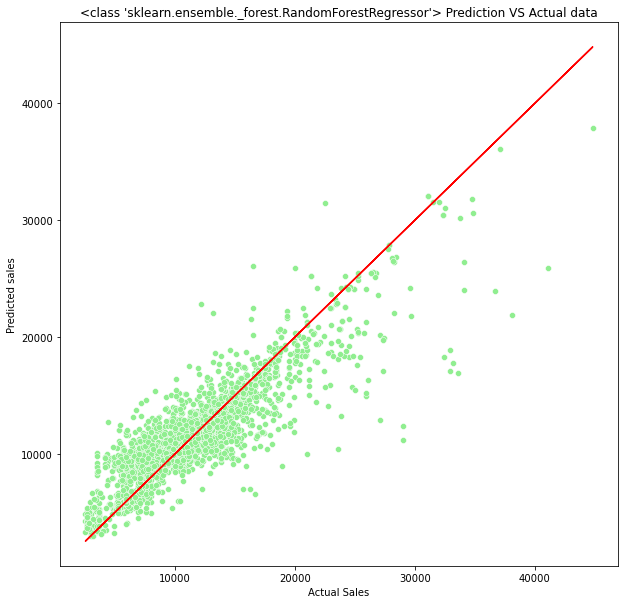

In [188]:
Reg_plot(rf2,x_test,y_test)

* Plotting Distribution Error in Predicted and Actual values 

In [189]:
pred=rf2.predict(x_test)

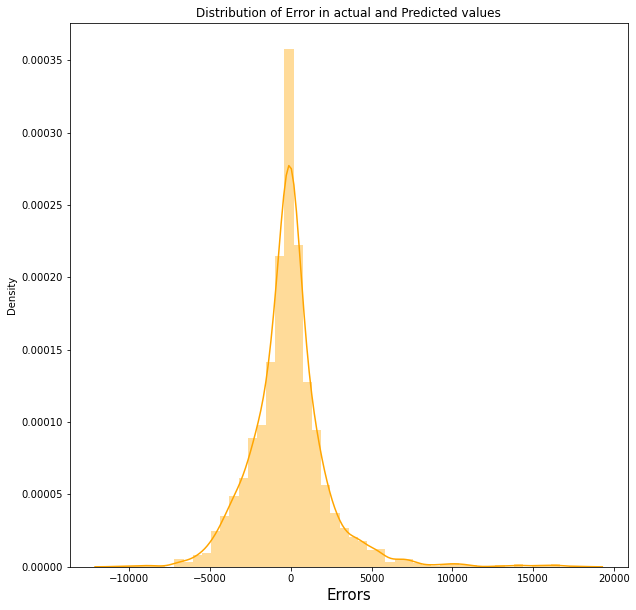

In [190]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-pred,color='orange')
plt.title("Distribution of Error in actual and Predicted values")
plt.xlabel('Errors',fontsize=15)
plt.show()


# Save a Model

In [191]:
import pickle
filename='FlightFarRF.pkl'
pickle.dump(rf2 ,open(filename,'wb'))